# Project-2: EDA 

Exploratory Data Analysis (EDA) delves into the data's depths, revealing its underlying patterns and connections.
- EDA is an initial exploration to grasp the data's nuances.
- It helps us to understan the different facets of the dataset.

1. Import the data
    - You can import data from a local computer, website, or using an API like yfinance.
    - You can also use some built-in datasets.
    - You can import Excel or CSV files.

2. Explore the Data
    - You can use the methods *head(), tail(), columns, index, info(), describe()*.

3. Cleaning and refining the data:
    - Check data types using info().
        - If a numerical feature is given as a string, do conversion.
        - If a date feature is given as a string, do conversion.
    - You can change the column or row labels.
        - You can use rename() to change column or row labels.
        - You can use reset_index() or set_index() to change indexes or row labels.
    - Rectifying missing values.
        - You can use *info(), isnull() or notnull()* to detect missing values.
        - You can either drop or fill the missing values.
            - Drop rows or columns with missing values.
        - Fill in the missing values.
            - You can fill it with a constant value or the mean/median of the column.
            - You can use imputation methods.
    - Eliminating duplications.
        - You can use *duplicate()* to determine repeated rows.
        - You can either drop the repetitions or keep them.
        - You can use *drop_duplicates()* to remove repetitions.
    - Filtering out extraneous noise.
    - Spotting and rectifying anomalies and outliers.
        - You can either remove them or keep them.
        - You can use different definitions of outliers.
            - One method is using the interquartile range (IQR).
    - Removing redundancies.
        - Drop the columns which do not provide useful information.
    - Scaling Data
        - If the scales of featues are different, it might be a good idea to change their scale to the same level.
        - You can use *StandardScaler()* or *MinMaxScaler()*.

4. Statistical Tools
    - Utilize statistical tools and graphs to derive insights from the data.
    - Uncovering significant features and interrelations among them.
    - You can find correlations between features using the method *corr()*.
    - You can display it using *sns.heatmap()*.

5. Visualization
    - Utilize graphs to derive insights from the data.
    - You can use line plots, scatter plots, histograms, pie charts, pair plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

## Import Data

In [2]:
amazon = yf.Ticker('AMZN').history(start='2000-01-01', end='2023-12-31').iloc[:,:-2]
amazon.head()

Open      High       Low     Close     Volume
Date                                                                        
2000-01-03 00:00:00-05:00  4.075000  4.478125  3.952344  4.468750  322352000
2000-01-04 00:00:00-05:00  4.268750  4.575000  4.087500  4.096875  349748000
2000-01-05 00:00:00-05:00  3.525000  3.756250  3.400000  3.487500  769148000
2000-01-06 00:00:00-05:00  3.565625  3.634375  3.200000  3.278125  375040000
2000-01-07 00:00:00-05:00  3.350000  3.525000  3.309375  3.478125  210108000

In [3]:
import pandas as pd
amazon.reset_index(inplace=True)
amazon.head()

Date      Open      High       Low     Close     Volume
0 2000-01-03 00:00:00-05:00  4.075000  4.478125  3.952344  4.468750  322352000
1 2000-01-04 00:00:00-05:00  4.268750  4.575000  4.087500  4.096875  349748000
2 2000-01-05 00:00:00-05:00  3.525000  3.756250  3.400000  3.487500  769148000
3 2000-01-06 00:00:00-05:00  3.565625  3.634375  3.200000  3.278125  375040000
4 2000-01-07 00:00:00-05:00  3.350000  3.525000  3.309375  3.478125  210108000

In [4]:
# year column
amazon['Year'] = amazon['Date'].dt.year
amazon['Month'] = amazon['Date'].dt.month
amazon['Day'] = amazon['Date'].dt.day
amazon.head()

Date      Open      High       Low     Close  \
0 2000-01-03 00:00:00-05:00  4.075000  4.478125  3.952344  4.468750   
1 2000-01-04 00:00:00-05:00  4.268750  4.575000  4.087500  4.096875   
2 2000-01-05 00:00:00-05:00  3.525000  3.756250  3.400000  3.487500   
3 2000-01-06 00:00:00-05:00  3.565625  3.634375  3.200000  3.278125   
4 2000-01-07 00:00:00-05:00  3.350000  3.525000  3.309375  3.478125   

      Volume  Year  Month  Day  
0  322352000  2000      1    3  
1  349748000  2000      1    4  
2  769148000  2000      1    5  
3  375040000  2000      1    6  
4  210108000  2000      1    7

In [5]:
# remove times from the values in 'Date' column
amazon['Date'] = pd.to_datetime(amazon['Date'].dt.date)
amazon.head()

Date      Open      High       Low     Close     Volume  Year  Month  \
0 2000-01-03  4.075000  4.478125  3.952344  4.468750  322352000  2000      1   
1 2000-01-04  4.268750  4.575000  4.087500  4.096875  349748000  2000      1   
2 2000-01-05  3.525000  3.756250  3.400000  3.487500  769148000  2000      1   
3 2000-01-06  3.565625  3.634375  3.200000  3.278125  375040000  2000      1   
4 2000-01-07  3.350000  3.525000  3.309375  3.478125  210108000  2000      1   

   Day  
0    3  
1    4  
2    5  
3    6  
4    7

### info()
Offers a rapid overview of the data.
- It highlights the count of null values and data types, which are crucial.
- Numeric columns might be represented as strings.
- Date columns might also be represented as strings

In [6]:
# data types and non-null values 
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6037 non-null   datetime64[ns]
 1   Open    6037 non-null   float64       
 2   High    6037 non-null   float64       
 3   Low     6037 non-null   float64       
 4   Close   6037 non-null   float64       
 5   Volume  6037 non-null   int64         
 6   Year    6037 non-null   int32         
 7   Month   6037 non-null   int32         
 8   Day     6037 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 353.9 KB


- Every entry in the dataset is non-null.
- The dataset contains 5283 entries starting from the second line.
- Each column in the table exhibits 5283 non-null values, indicating a complete absence of null values throughout.

### describe()
- descriptive statistics
- summary of the numerical columns

In [7]:
# no need for 'Date' column
amazon.iloc[:,1:].describe()

Open         High          Low        Close        Volume  \
count  6037.000000  6037.000000  6037.000000  6037.000000  6.037000e+03   
mean     37.918211    38.368754    37.429891    37.909060  1.217359e+08   
std      51.570914    52.176971    50.906212    51.542803  9.828832e+07   
min       0.295500     0.305000     0.275500     0.298500  1.762600e+07   
25%       2.268000     2.303500     2.229500     2.269500  6.572600e+07   
50%      10.266500    10.400000    10.105000    10.272000  9.936200e+07   
75%      59.740002    60.266998    59.415001    59.680000  1.461800e+08   
max     187.199997   188.654007   184.839493   186.570496  2.086584e+09   

              Year        Month          Day  
count  6037.000000  6037.000000  6037.000000  
mean   2011.501739     6.543316    15.739937  
std       6.918838     3.426544     8.755910  
min    2000.000000     1.000000     1.000000  
25%    2006.000000     4.000000     8.000000  
50%    2011.000000     7.000000    16.000000  
75%    2017.000000    10.000000    23.000000  
max    2023.000000    12.000000    31.000000

### missing values

In [8]:
amazon.isnull().head()

Date   Open   High    Low  Close  Volume   Year  Month    Day
0  False  False  False  False  False   False  False  False  False
1  False  False  False  False  False   False  False  False  False
2  False  False  False  False  False   False  False  False  False
3  False  False  False  False  False   False  False  False  False
4  False  False  False  False  False   False  False  False  False

In [9]:
amazon.isnull().head()

Date   Open   High    Low  Close  Volume   Year  Month    Day
0  False  False  False  False  False   False  False  False  False
1  False  False  False  False  False   False  False  False  False
2  False  False  False  False  False   False  False  False  False
3  False  False  False  False  False   False  False  False  False
4  False  False  False  False  False   False  False  False  False

In [10]:
# no missing values in each column
amazon.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
Month     0
Day       0
dtype: int64

In [11]:
# non-null values
amazon.notnull().head()

Date  Open  High   Low  Close  Volume  Year  Month   Day
0  True  True  True  True   True    True  True   True  True
1  True  True  True  True   True    True  True   True  True
2  True  True  True  True   True    True  True   True  True
3  True  True  True  True   True    True  True   True  True
4  True  True  True  True   True    True  True   True  True

## Close

In [12]:
df = amazon[['Date', 'Close', 'Year', 'Month', 'Day']].copy()
df.head()

Date     Close  Year  Month  Day
0 2000-01-03  4.468750  2000      1    3
1 2000-01-04  4.096875  2000      1    4
2 2000-01-05  3.487500  2000      1    5
3 2000-01-06  3.278125  2000      1    6
4 2000-01-07  3.478125  2000      1    7

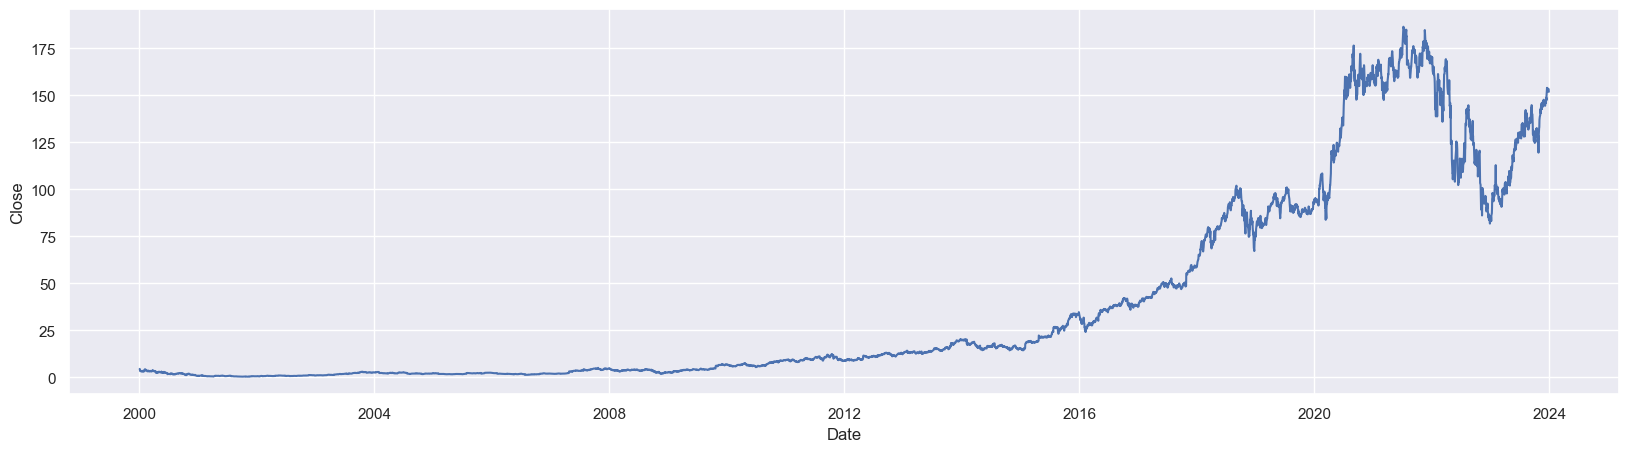

In [13]:
sns.set_theme()     # change the theme
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df);

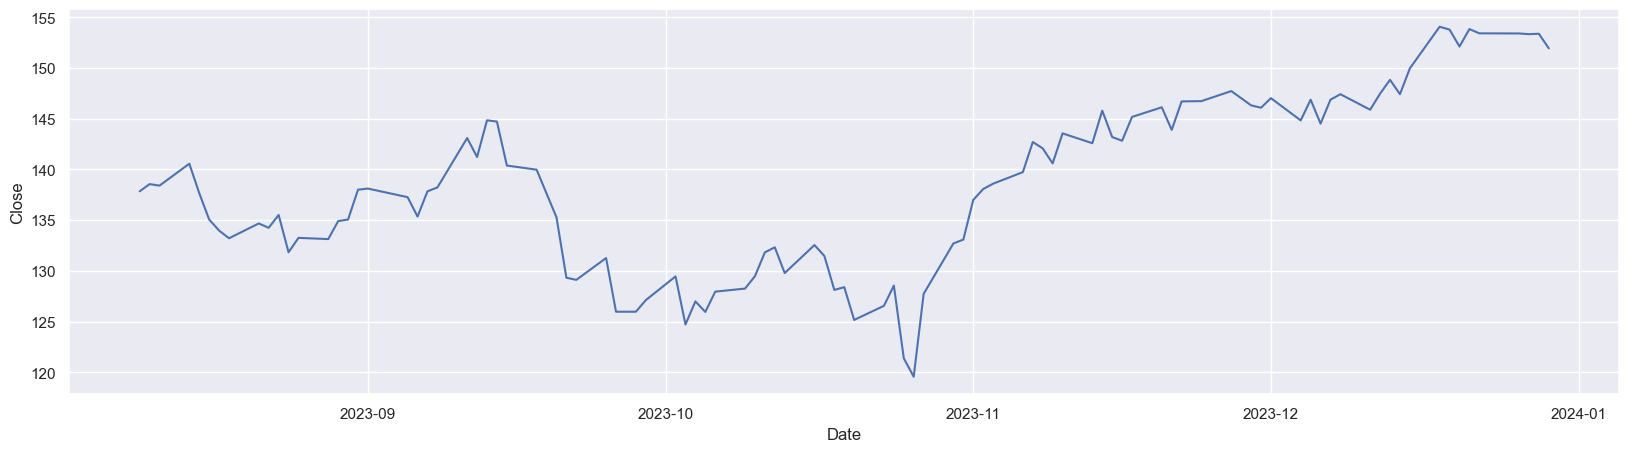

In [14]:
# last 100 rows
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[-100:,:]);

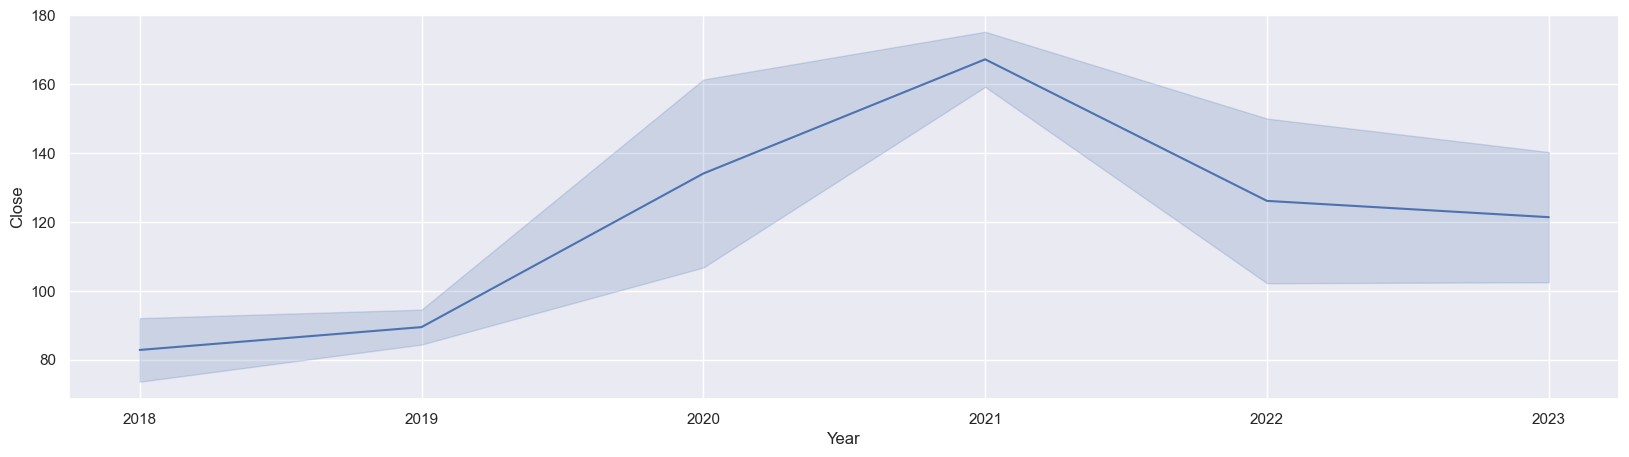

In [15]:
# error bars at +/- 1 sd around the mean
plt.figure(figsize=(20,5))
sns.lineplot(x='Year', y='Close', data=df.iloc[-1500:,:], errorbar='sd');

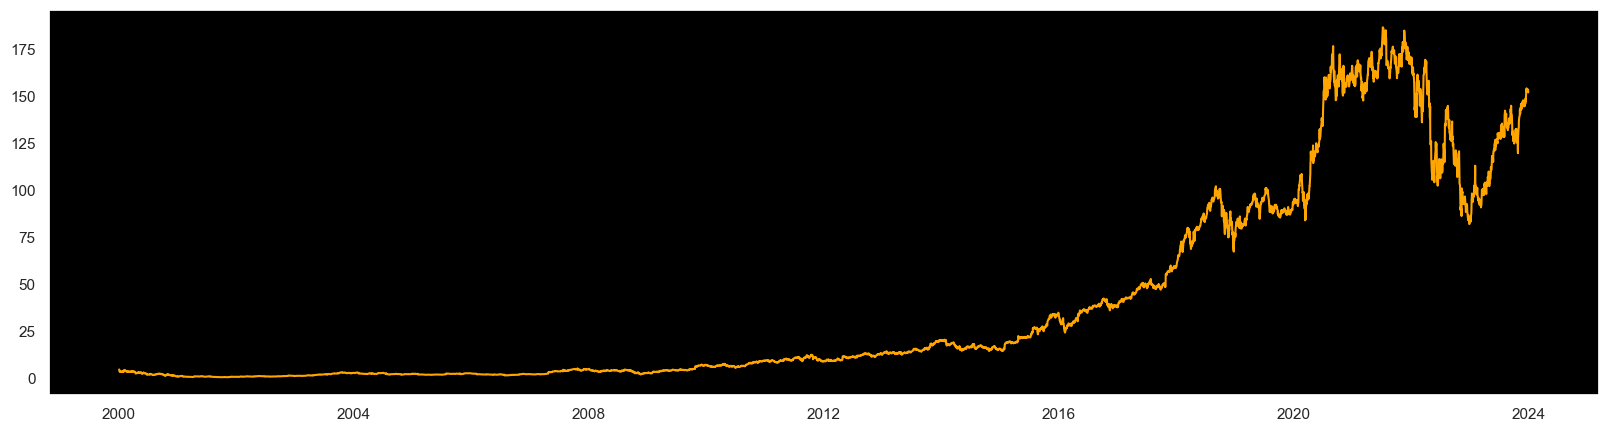

In [16]:
plt.figure(figsize=(20,5))
plt.axes().set_facecolor('black');
plt.plot(df['Date'], df['Close'], color='orange')
plt.grid(visible=False);

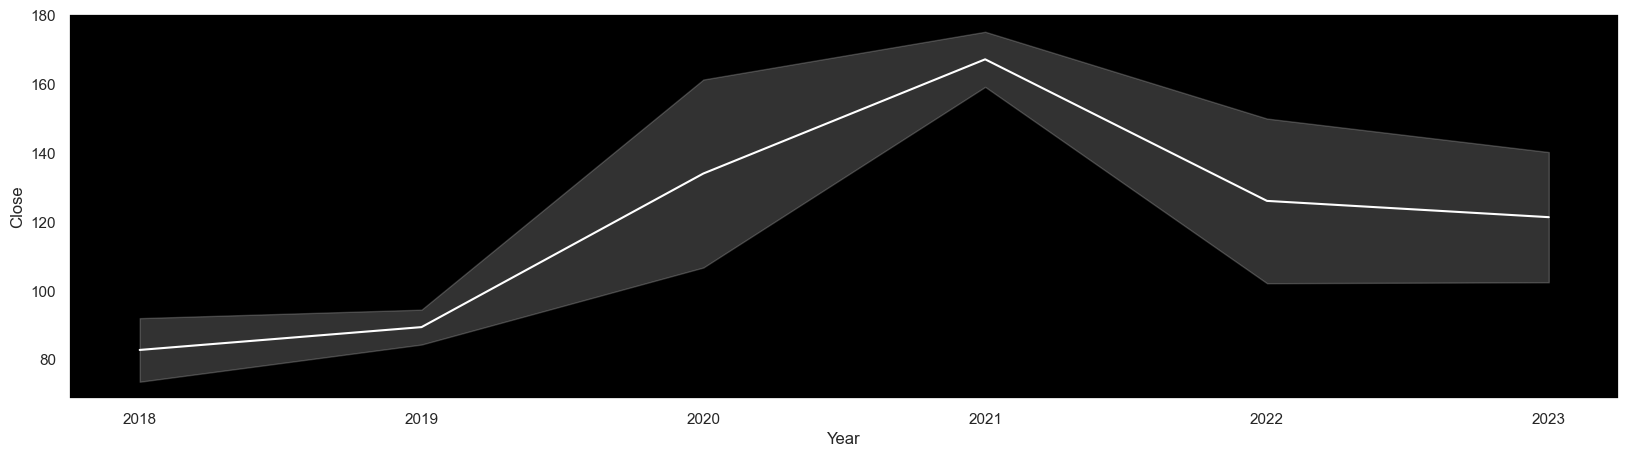

In [17]:
# error bars at +/- 1 sd around the mean
plt.figure(figsize=(20,5))
plt.axes().set_facecolor('black');
sns.lineplot(x='Year', y='Close', data=df.iloc[-1500:,:], errorbar='sd', color='white')
plt.grid(visible=False);

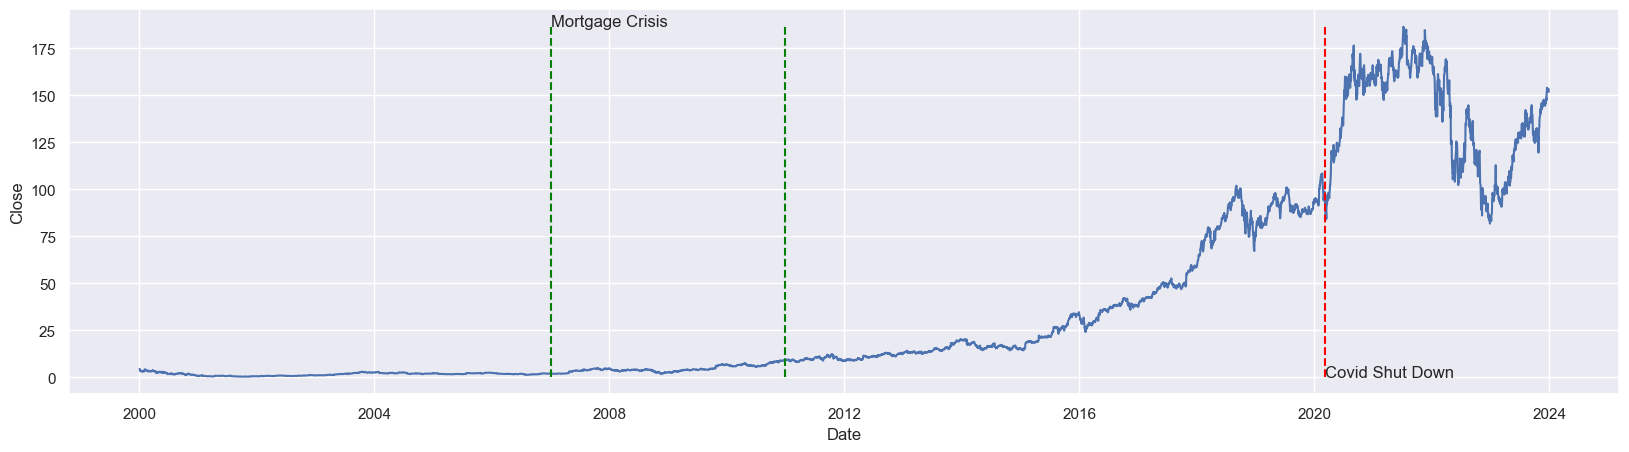

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df)
plt.vlines(pd.Timestamp('2020-03-05'), df.Close.min(), df.Close.max(), color='red', linestyle='dashed')
plt.vlines(pd.Timestamp('2007-01-01'), df.Close.min(), df.Close.max(), color='green', linestyle='dashed')
plt.vlines(pd.Timestamp('2010-12-31'), df.Close.min(), df.Close.max(), color='green', linestyle='dashed')
plt.text(pd.Timestamp('2020-03-05'), df.Close.min(), 'Covid Shut Down')
plt.text(pd.Timestamp('2007-01-01'), df.Close.max(), 'Mortgage Crisis');

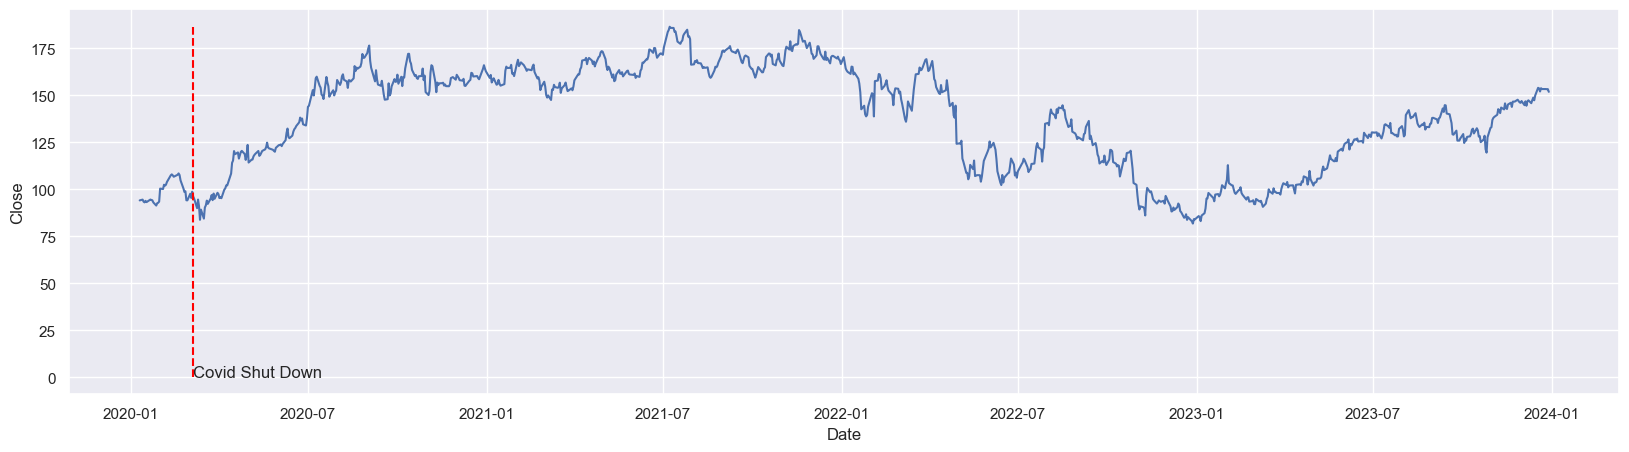

In [19]:
N = 1000
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[-N:,:])
plt.vlines(pd.Timestamp('2020-03-05'), df.Close.min(), df.Close.max(), color='red', linestyle='dashed')
plt.text(pd.Timestamp('2020-03-05'), df.Close.min(), 'Covid Shut Down');

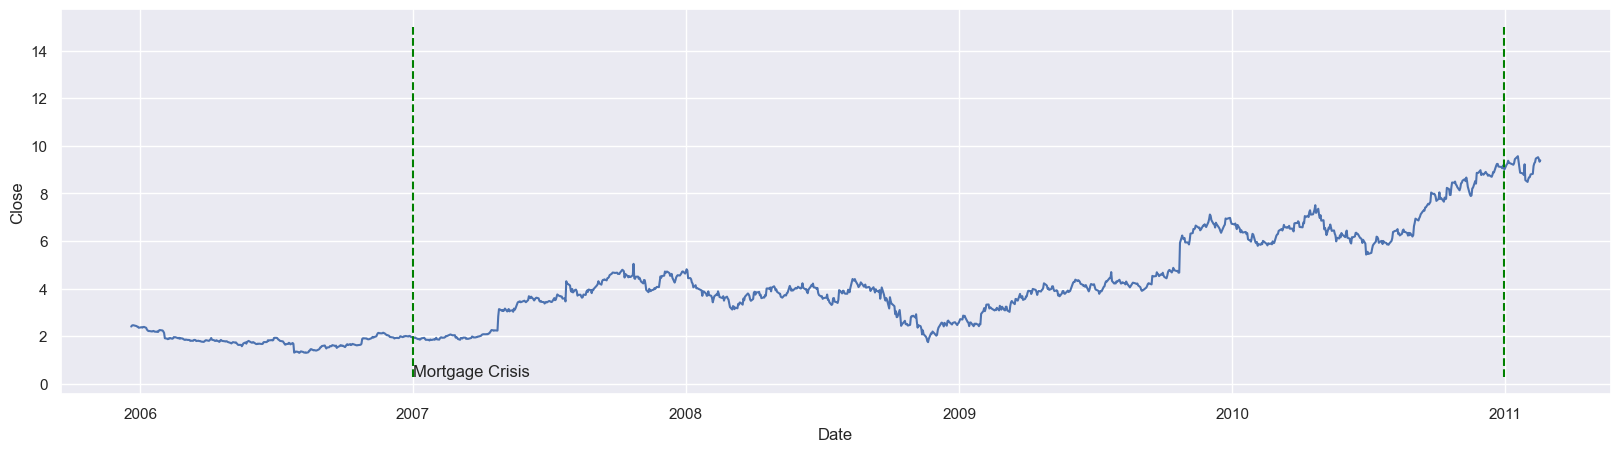

In [20]:
N = 1500
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y='Close', data=df.iloc[N:N+1300,:])

plt.vlines(pd.Timestamp('2007-01-01'), df.Close.min(), 15, color='green', linestyle='dashed')
plt.vlines(pd.Timestamp('2010-12-31'), df.Close.min(), 15, color='green', linestyle='dashed')

plt.text(pd.Timestamp('2007-01-01'), df.Close.min(), 'Mortgage Crisis');

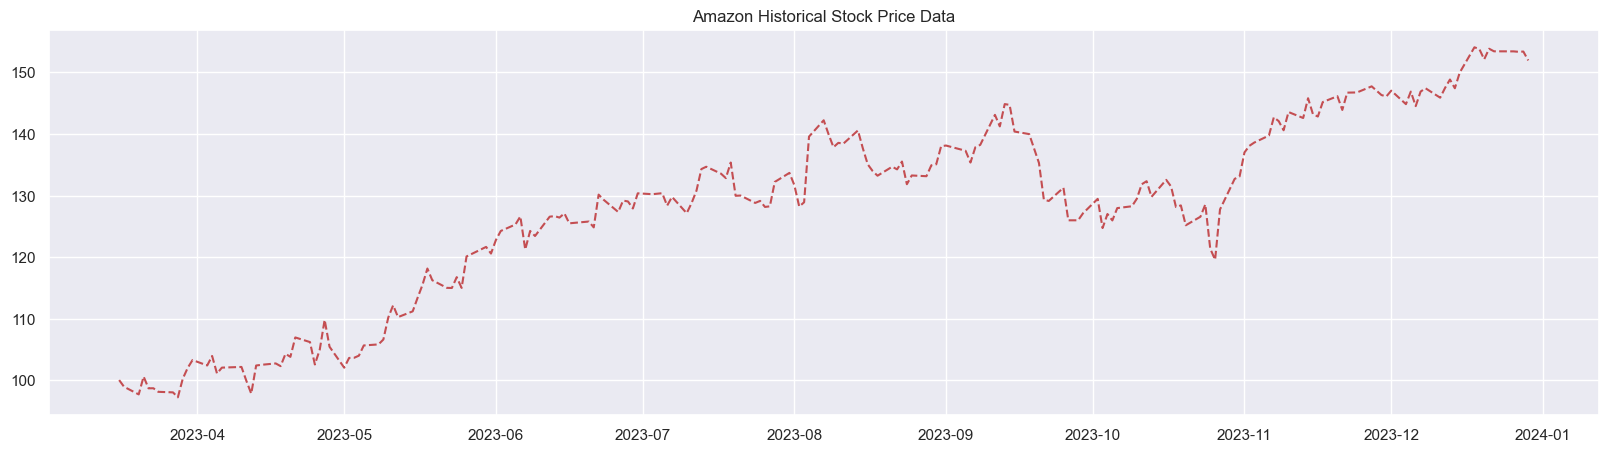

In [21]:
plt.figure(figsize=(20,5))
plt.plot(df.Date[-200:], df.Close[-200:], 'r--')
plt.title('Amazon Historical Stock Price Data');

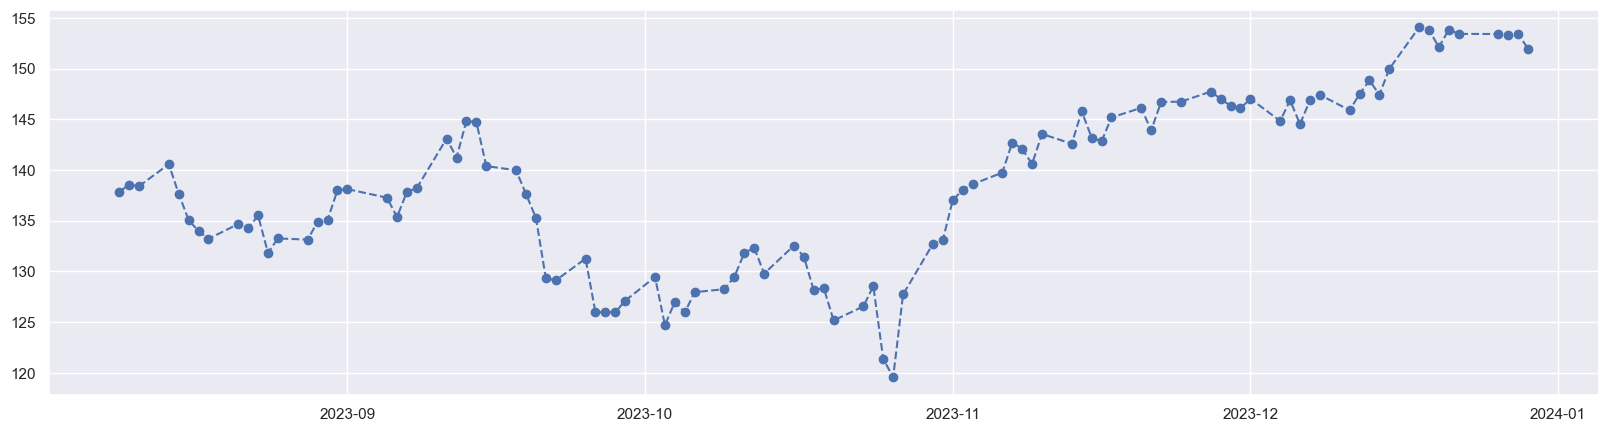

In [22]:
plt.figure(figsize=(20,5))
plt.plot(df.Date[-100:], df.Close[-100:], linestyle='--', marker='o', label='Close');

## Boxplot

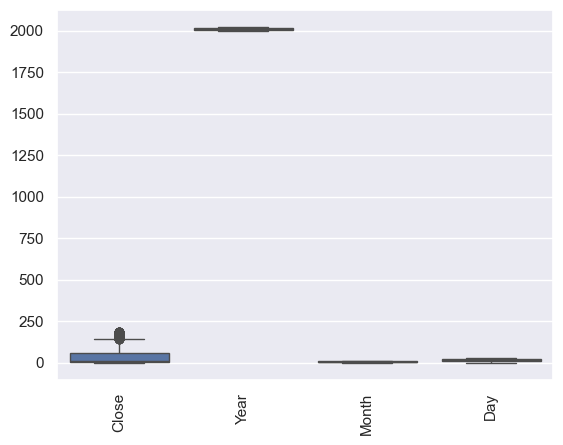

In [23]:
# all columns
sns.boxplot(df)
plt.xticks(rotation=90);

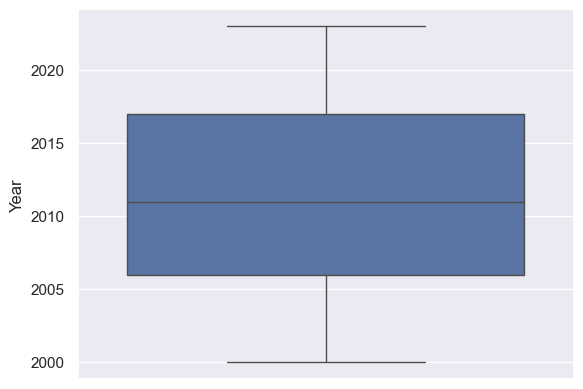

In [24]:
# only Year
sns.boxplot(df['Year']);

- Stock prices have mostly risen over time

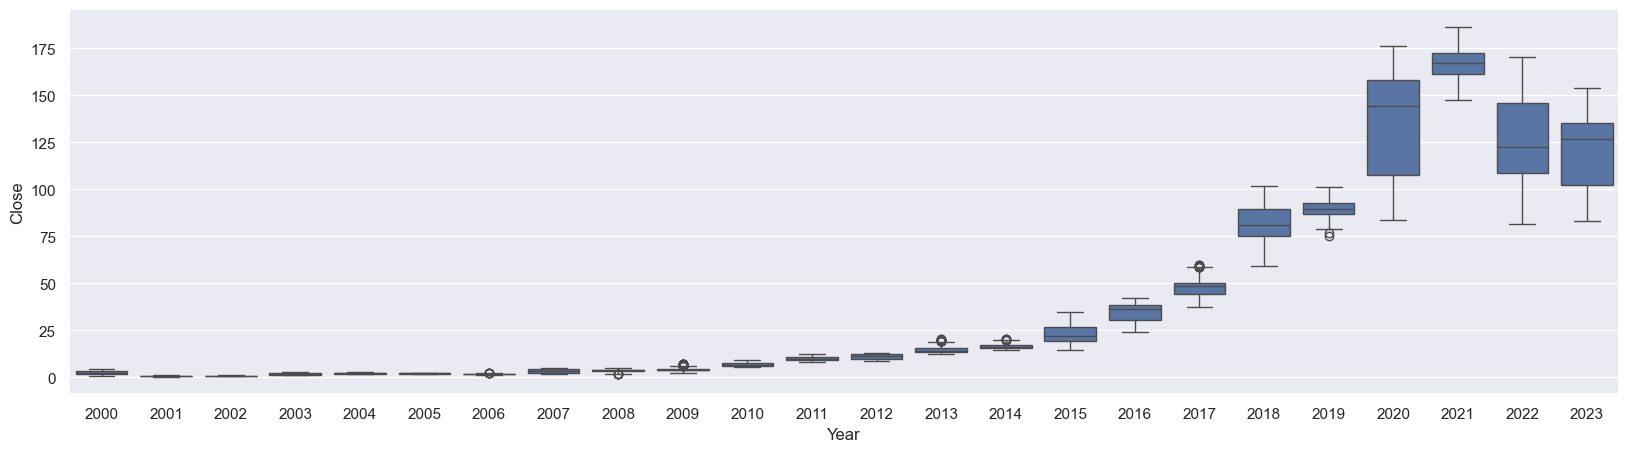

In [25]:
plt.figure(figsize=(20,5))
sns.boxplot(x = 'Year', y='Close', data=df);

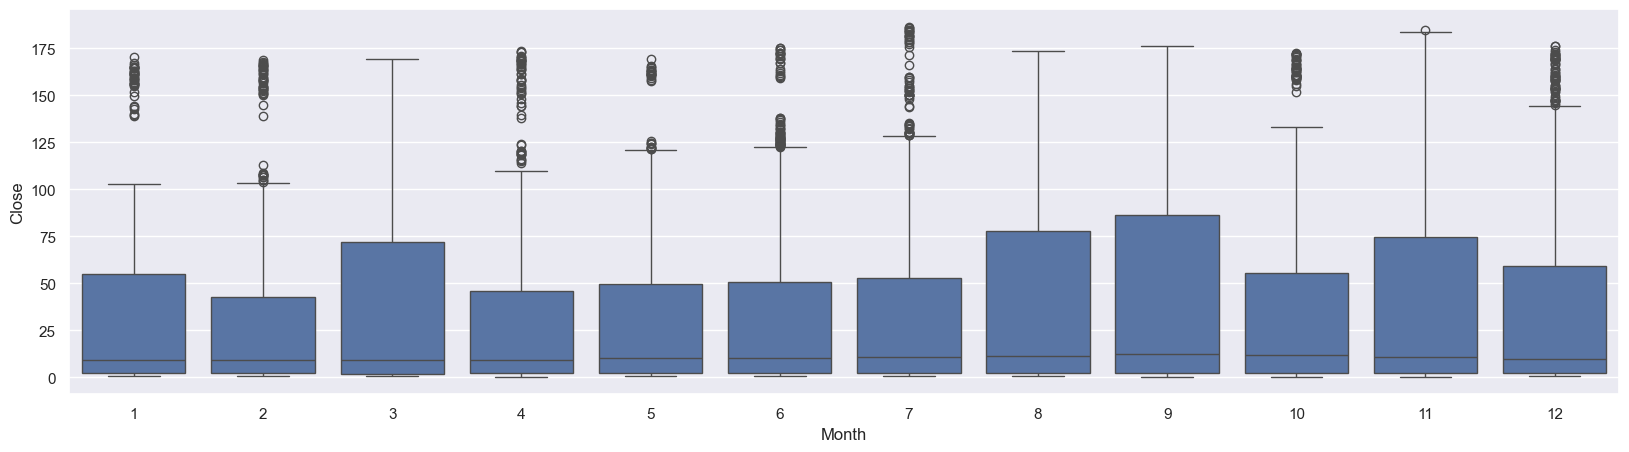

In [26]:
plt.figure(figsize=(20,5))
sns.boxplot(x = 'Month', y='Close', data=df);

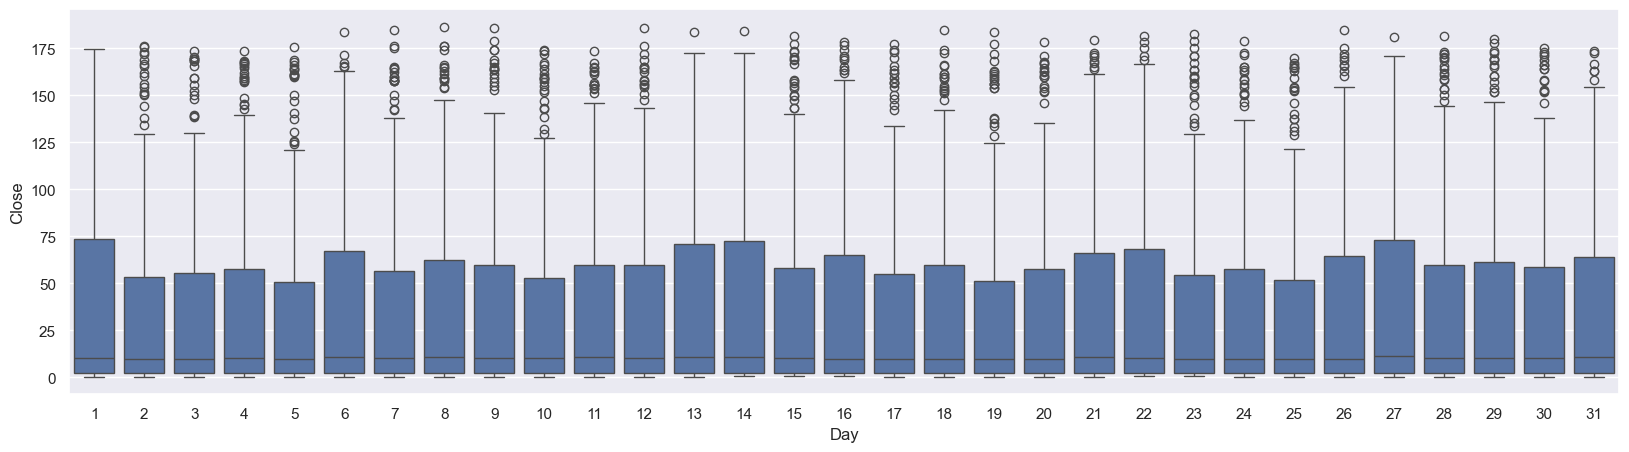

In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(x = 'Day', y='Close', data=df);

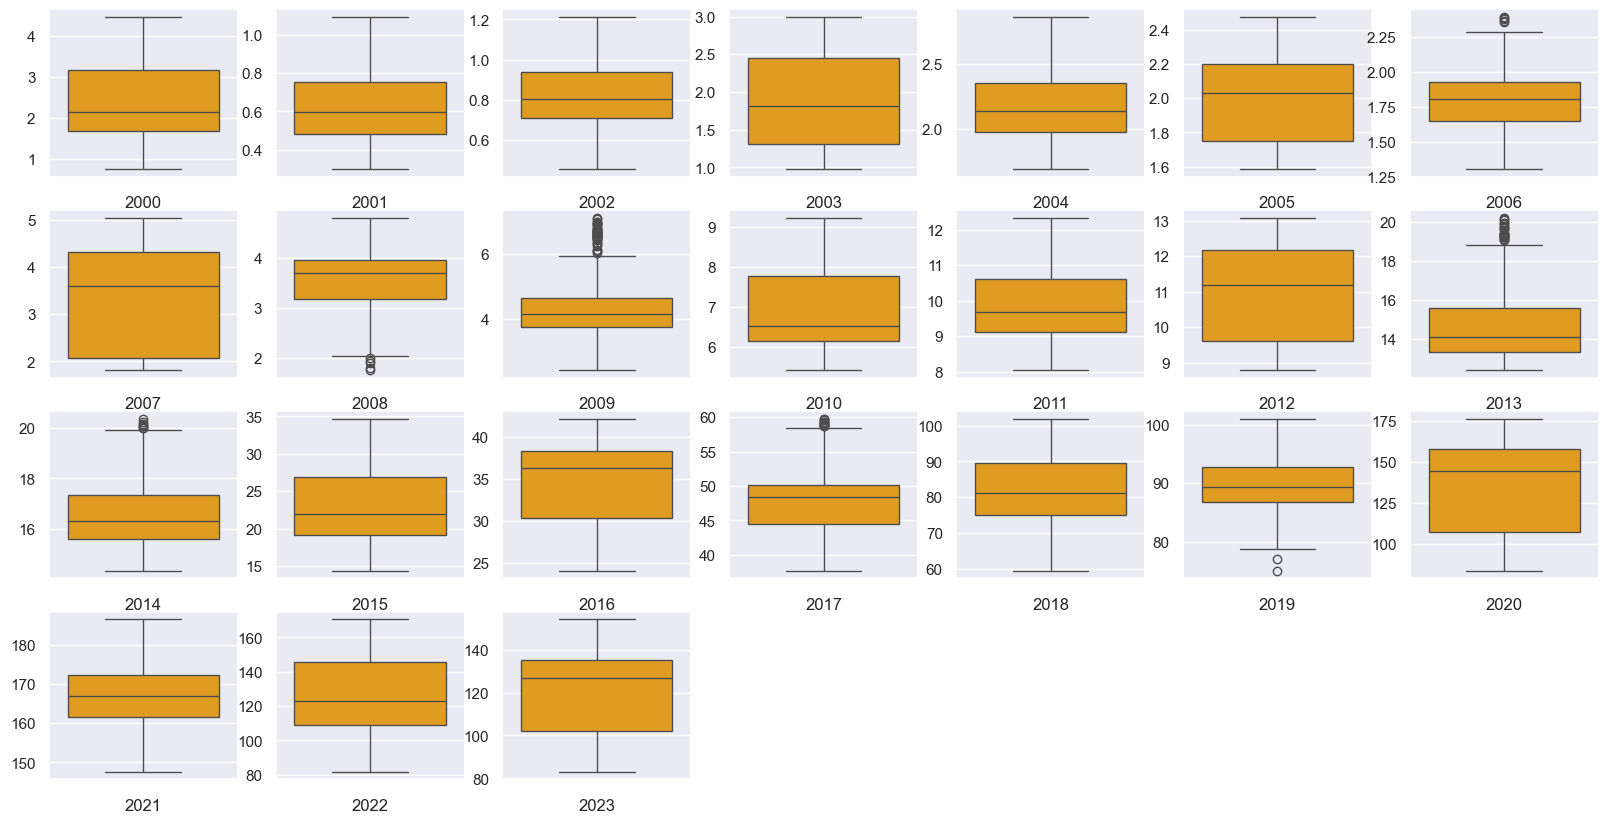

In [28]:
# boxplot for each year
years = np.unique(df.Year.values)
s = 1
plt.figure(figsize=(20,10))
for i in years:
  plt.subplot(4, int(len(years)/4)+1, s)
  sns.boxplot( y=df[df['Year']==i]['Close'], color='orange')
  plt.xlabel(i)
  plt.ylabel(None)
  s += 1

## Percentage Change

In [29]:
df['Pct_Change'] = df.Close.pct_change()
df.head()

Date     Close  Year  Month  Day  Pct_Change
0 2000-01-03  4.468750  2000      1    3         NaN
1 2000-01-04  4.096875  2000      1    4   -0.083217
2 2000-01-05  3.487500  2000      1    5   -0.148741
3 2000-01-06  3.278125  2000      1    6   -0.060036
4 2000-01-07  3.478125  2000      1    7    0.061010

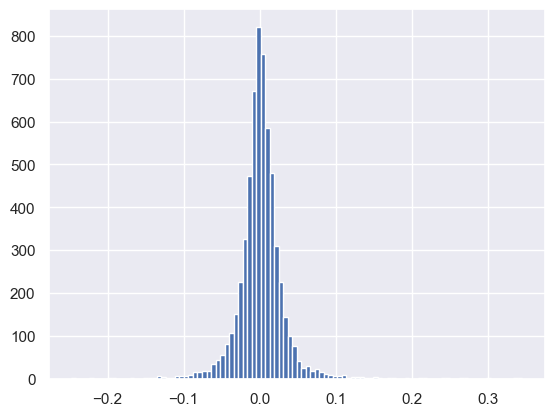

In [30]:
plt.hist( df['Pct_Change'], bins=100);

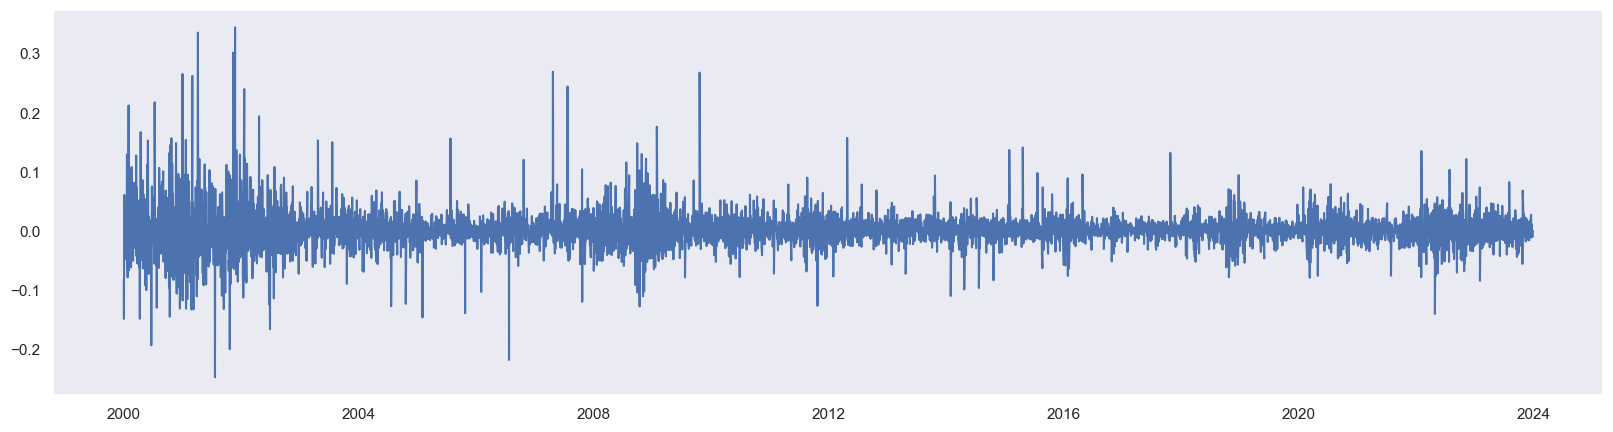

In [31]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Pct_Change'])
plt.grid();

<font color=blue> **Conclusion:** High volatility occured during certain periods. </font>

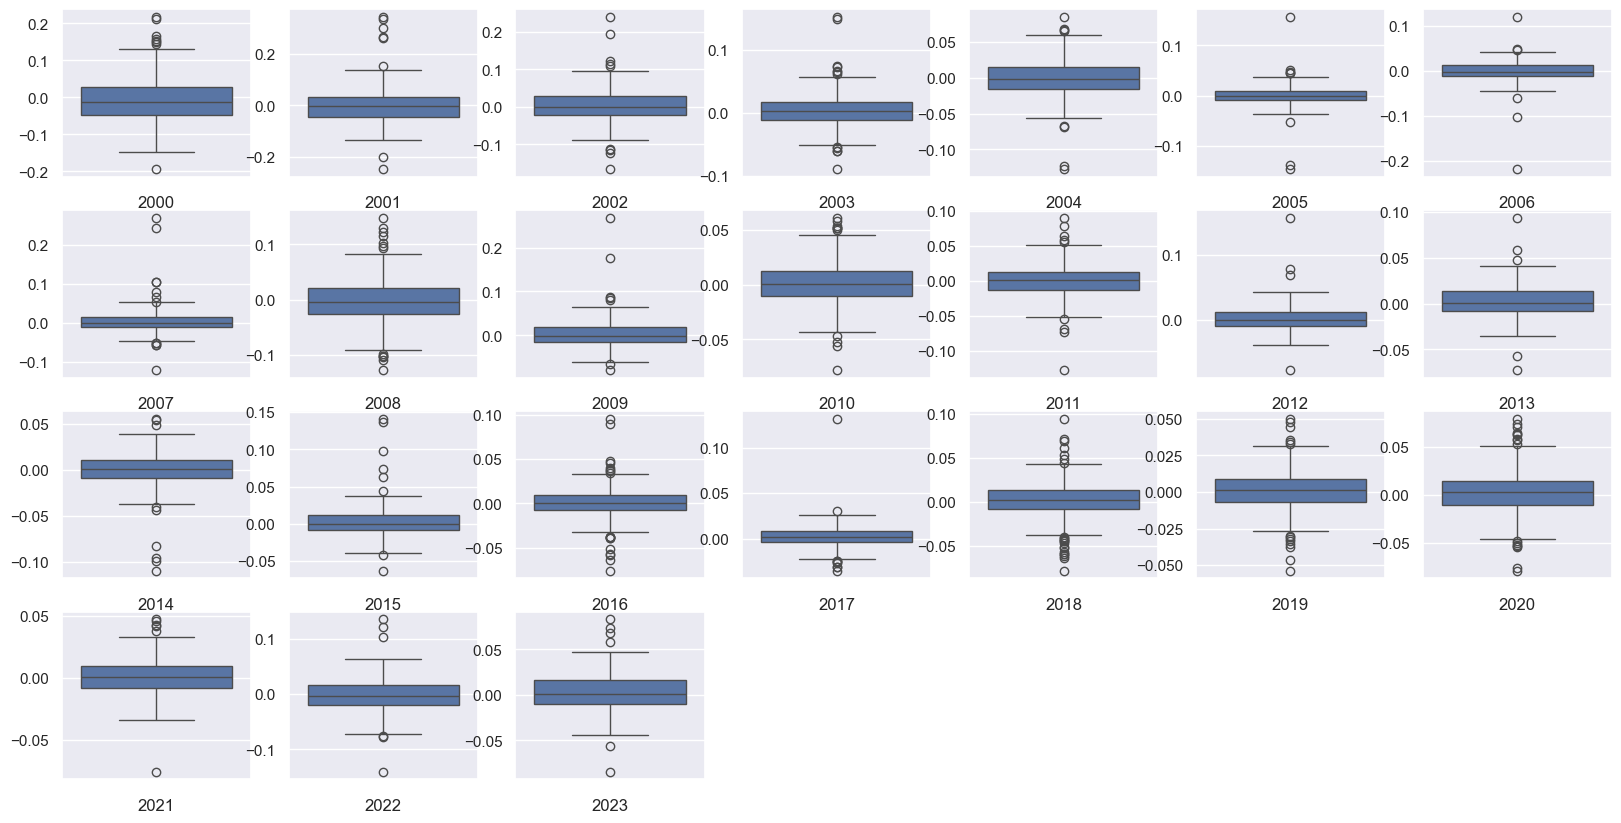

In [32]:
s = 1
plt.figure(figsize=(20,10))
for i in years:
  plt.subplot(4, int(len(years)/4)+1, s)
  sns.boxplot( y=df[df['Year']==i]['Pct_Change'])
  plt.xlabel(i)
  plt.ylabel(None)
  s += 1

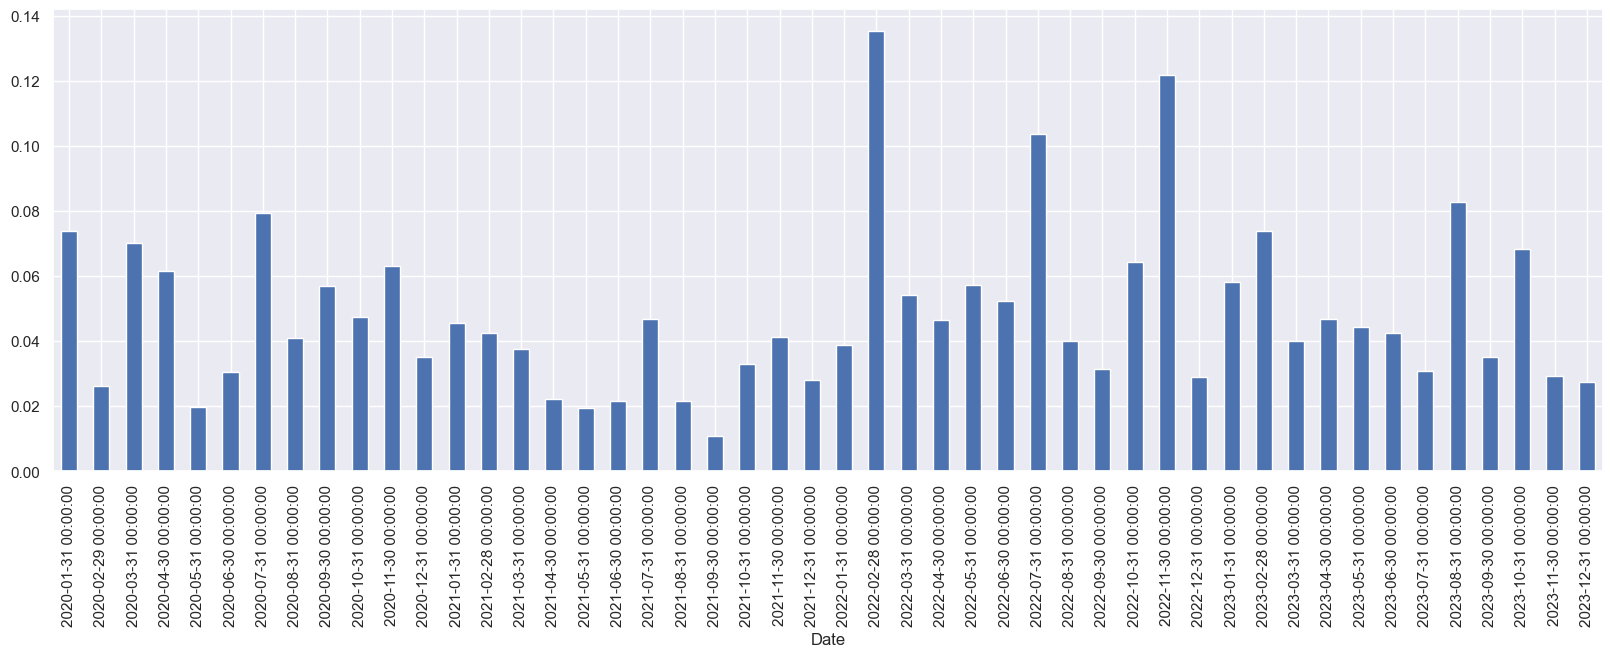

In [33]:
df2 = df.copy()
df2.set_index('Date', inplace=True)
df2['Pct_Change'][-1000:].resample(rule='M').max().plot(kind='bar',figsize=(20,6));

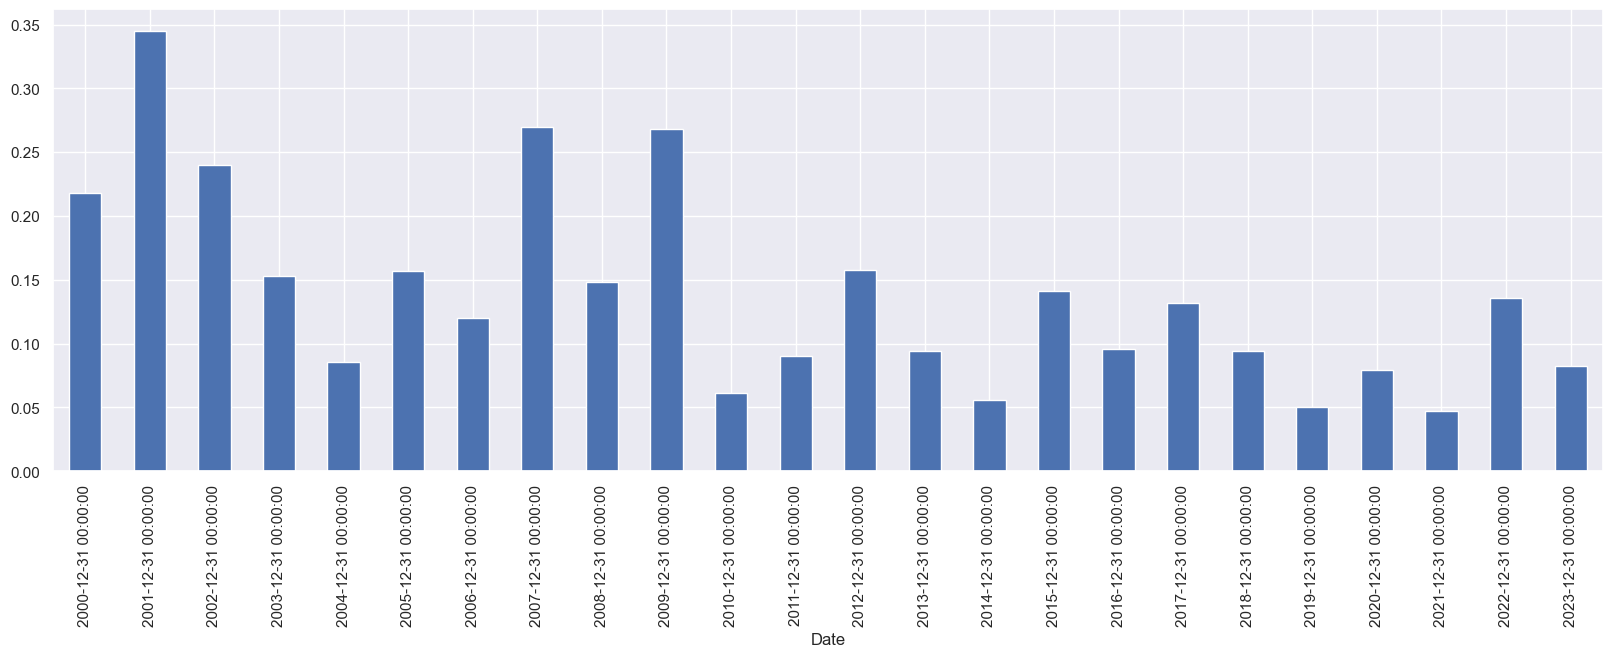

In [34]:
df2 = df.copy()
df2.set_index('Date', inplace=True)
df2['Pct_Change'].resample(rule='Y').max().plot(kind='bar',figsize=(20,6));

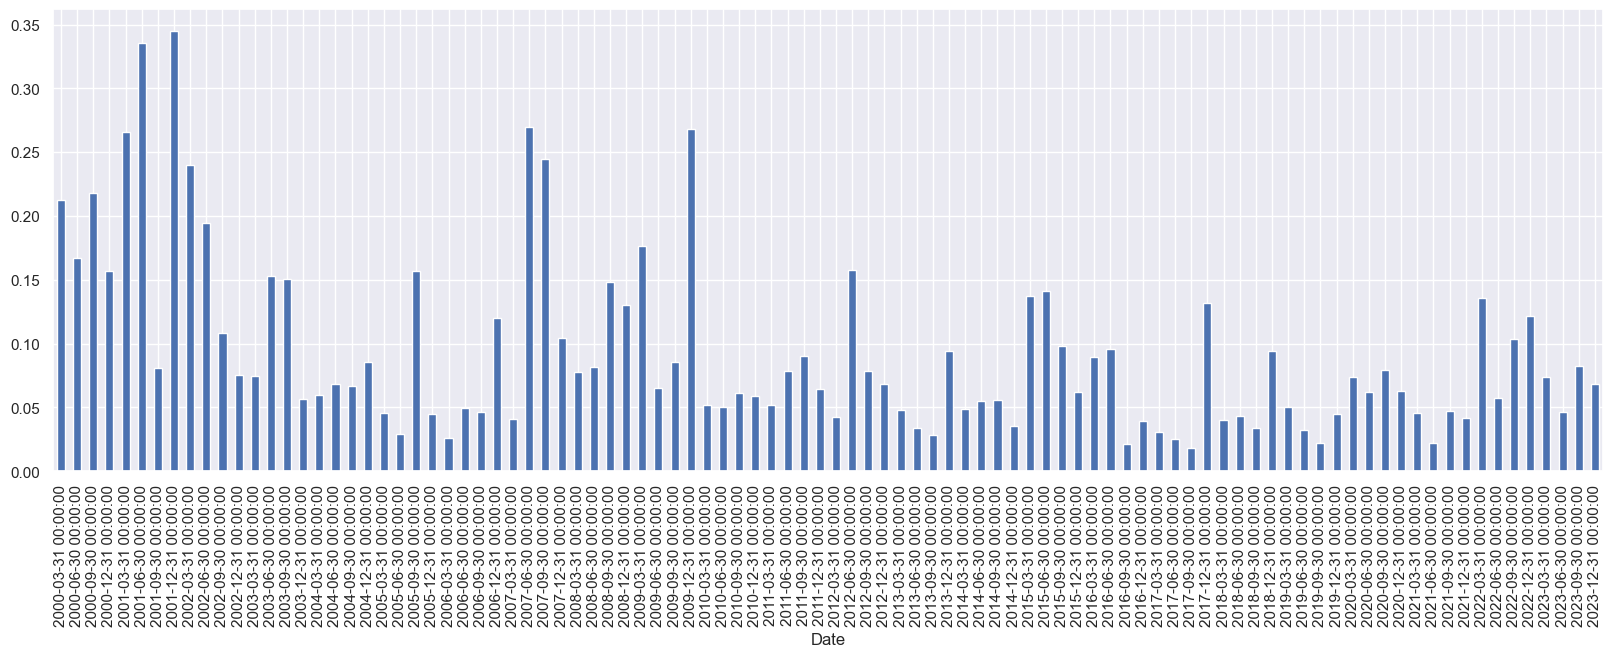

In [35]:
df2 = df.copy()
df2.set_index('Date', inplace=True)
df2['Pct_Change'].resample(rule='Q').max().plot(kind='bar',figsize=(20,6));

## Swarm and Violin Plots

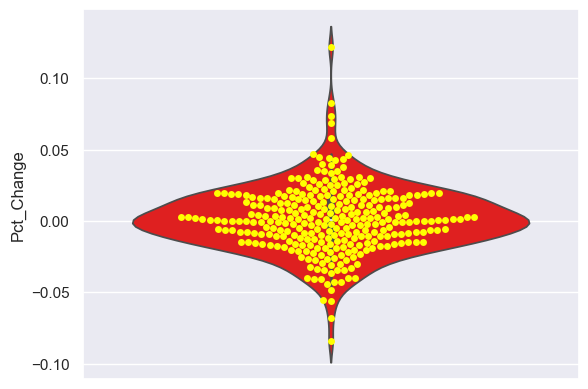

In [36]:
N = 300
sns.swarmplot(df2.Pct_Change[-N:], color='yellow')
sns.violinplot(df2.Pct_Change[-N:], color='red');

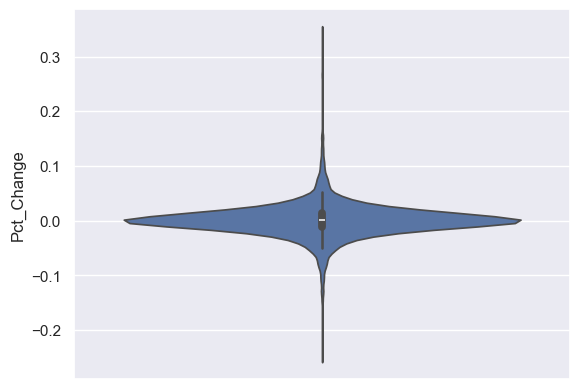

In [37]:
sns.violinplot(df2.Pct_Change);

## Outlier

In [38]:
q1 = df['Pct_Change'].quantile(0.25)
q3 = df['Pct_Change'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

df[(df['Pct_Change'] >= upper_bound) | (df['Pct_Change'] <= lower_bound)].head()

Date     Close  Year  Month  Day  Pct_Change
1  2000-01-04  4.096875  2000      1    4   -0.083217
2  2000-01-05  3.487500  2000      1    5   -0.148741
3  2000-01-06  3.278125  2000      1    6   -0.060036
4  2000-01-07  3.478125  2000      1    7    0.061010
14 2000-01-24  3.506250  2000      1   24    0.129909

In [39]:
df['Date'][0]

Timestamp('2000-01-03 00:00:00')

In [40]:
df['Date'][len(df)-1]

Timestamp('2023-12-29 00:00:00')

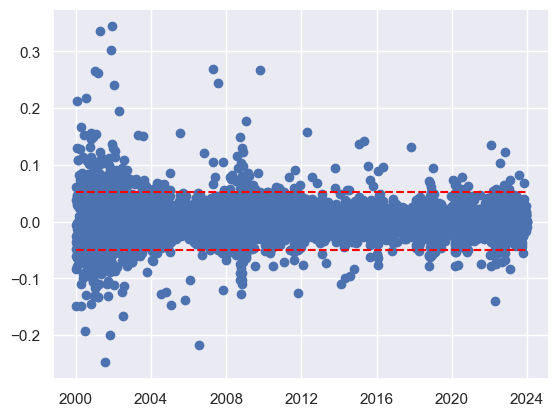

In [41]:
plt.scatter(df['Date'], df['Pct_Change'])
plt.hlines(upper_bound, df['Date'][0],df['Date'][len(df)-1],  color='red', linestyle='dashed')
plt.hlines(lower_bound, df['Date'][0],df['Date'][len(df)-1],  color='red', linestyle='dashed');

## Direction

In [42]:
df['Direction'] = np.where(df.Pct_Change.values>0, 1, -1)
df.head()

Date     Close  Year  Month  Day  Pct_Change  Direction
0 2000-01-03  4.468750  2000      1    3         NaN         -1
1 2000-01-04  4.096875  2000      1    4   -0.083217         -1
2 2000-01-05  3.487500  2000      1    5   -0.148741         -1
3 2000-01-06  3.278125  2000      1    6   -0.060036         -1
4 2000-01-07  3.478125  2000      1    7    0.061010          1

In [43]:
df.value_counts('Direction')

Direction
 1    3079
-1    2958
Name: count, dtype: int64

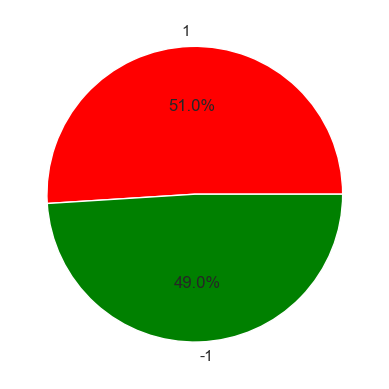

In [44]:
plt.pie(df.value_counts('Direction').values, labels=df.value_counts('Direction').index, autopct='%1.1f%%', colors=['red','green']);

## Moving Average

In [45]:
df['SMA-50'] = df.Close.rolling(50).mean()
df['SMA-100'] = df.Close.rolling(100).mean()
df.head()

Date     Close  Year  Month  Day  Pct_Change  Direction  SMA-50  \
0 2000-01-03  4.468750  2000      1    3         NaN         -1     NaN   
1 2000-01-04  4.096875  2000      1    4   -0.083217         -1     NaN   
2 2000-01-05  3.487500  2000      1    5   -0.148741         -1     NaN   
3 2000-01-06  3.278125  2000      1    6   -0.060036         -1     NaN   
4 2000-01-07  3.478125  2000      1    7    0.061010          1     NaN   

   SMA-100  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [46]:
df['EWM-50'] = df.Close.ewm(50).mean()
df['EWM-100'] = df.Close.ewm(100).mean()
df.head()

Date     Close  Year  Month  Day  Pct_Change  Direction  SMA-50  \
0 2000-01-03  4.468750  2000      1    3         NaN         -1     NaN   
1 2000-01-04  4.096875  2000      1    4   -0.083217         -1     NaN   
2 2000-01-05  3.487500  2000      1    5   -0.148741         -1     NaN   
3 2000-01-06  3.278125  2000      1    6   -0.060036         -1     NaN   
4 2000-01-07  3.478125  2000      1    7    0.061010          1     NaN   

   SMA-100    EWM-50   EWM-100  
0      NaN  4.468750  4.468750  
1      NaN  4.280972  4.281888  
2      NaN  4.011227  4.014453  
3      NaN  3.822472  3.827614  
4      NaN  3.750848  3.756318

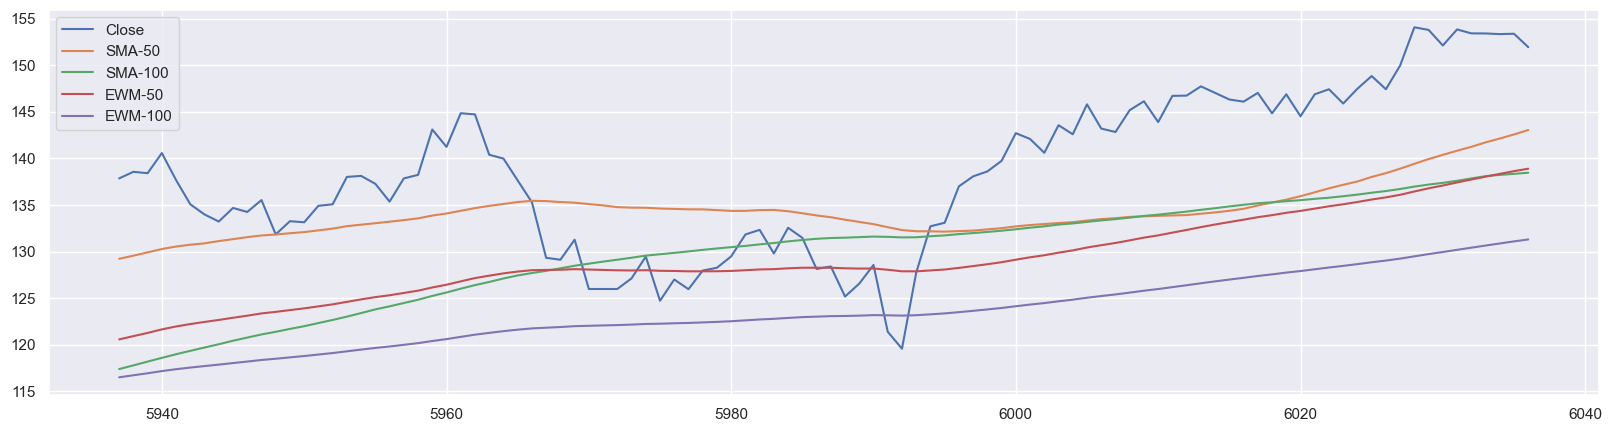

In [47]:
N =100
plt.figure(figsize=(20,5))
plt.plot(df.Close[-N:], label='Close')
plt.plot(df['SMA-50'][-N:], label='SMA-50')
plt.plot(df['SMA-100'][-N:], label='SMA-100')
plt.plot(df['EWM-50'][-N:], label='EWM-50')
plt.plot(df['EWM-100'][-N:], label='EWM-100')
plt.legend();

In [48]:
df.head()

Date     Close  Year  Month  Day  Pct_Change  Direction  SMA-50  \
0 2000-01-03  4.468750  2000      1    3         NaN         -1     NaN   
1 2000-01-04  4.096875  2000      1    4   -0.083217         -1     NaN   
2 2000-01-05  3.487500  2000      1    5   -0.148741         -1     NaN   
3 2000-01-06  3.278125  2000      1    6   -0.060036         -1     NaN   
4 2000-01-07  3.478125  2000      1    7    0.061010          1     NaN   

   SMA-100    EWM-50   EWM-100  
0      NaN  4.468750  4.468750  
1      NaN  4.280972  4.281888  
2      NaN  4.011227  4.014453  
3      NaN  3.822472  3.827614  
4      NaN  3.750848  3.756318

### Moving Average Signals
- A buy signal occurs when the shorter-term moving average (MA) crosses above the longer-term MA, signaling an upward trend shift, commonly referred to as a "golden cross".
- A sell signal occurs when the shorter-term moving average (MA) crosses below the longer-term MA, signaling an downward trend shift, commonly referred to as a "dead/death cross".

**Reference:** https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=Moving%20averages%20with%20a%20shorter,of%20potential%20support%20or%20resistance

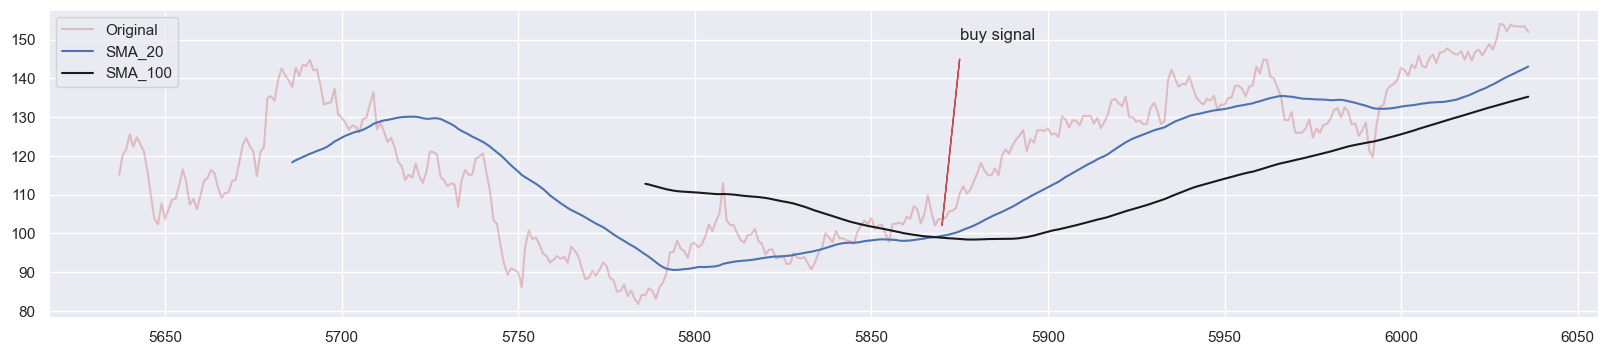

In [92]:
plt.figure(figsize=(20,4))
N=400
plt.plot(df.iloc[-N:,:].Close, label = 'Original', c='r', alpha=0.3)
plt.plot(df.iloc[-N:,:].Close.rolling(50).mean(), label = 'SMA_20')
plt.plot(df.iloc[-N:,:].Close.rolling(150).mean(), label = 'SMA_100', c='k')
plt.text(5875, 150, 'buy signal')
plt.arrow(5875, 145, -5, -43 , color='r')
plt.legend();

## Histogram

Displays the frequency of instances within each specified value range.

In [44]:
df.shape

(6037, 11)

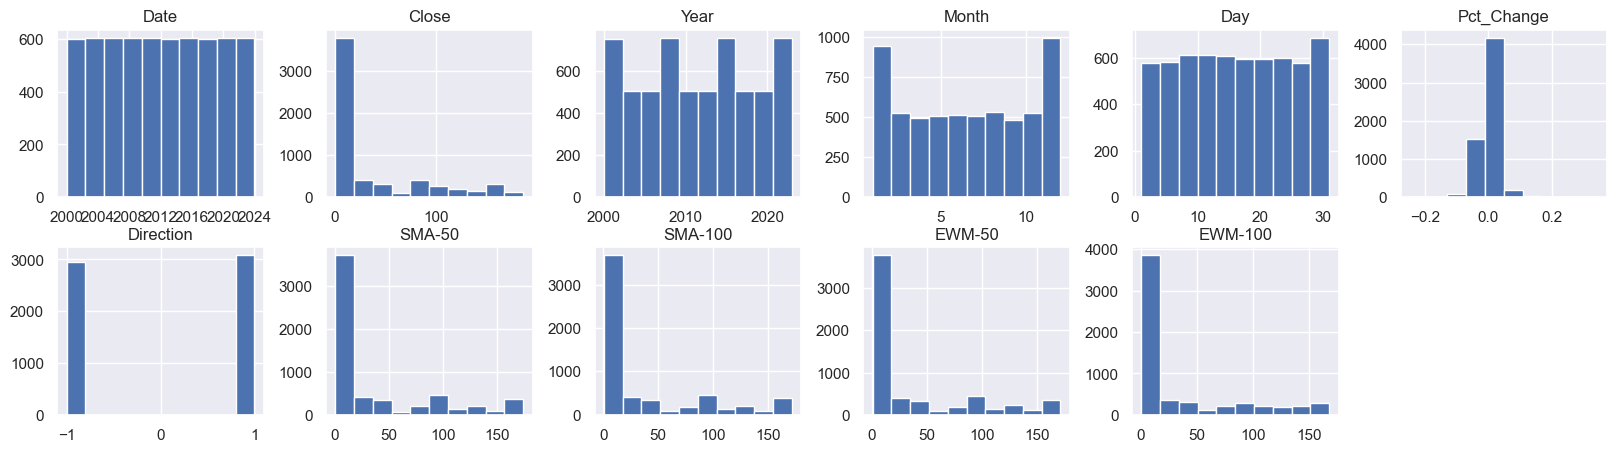

In [45]:
df.hist(layout=(2,6), figsize=(20,5));

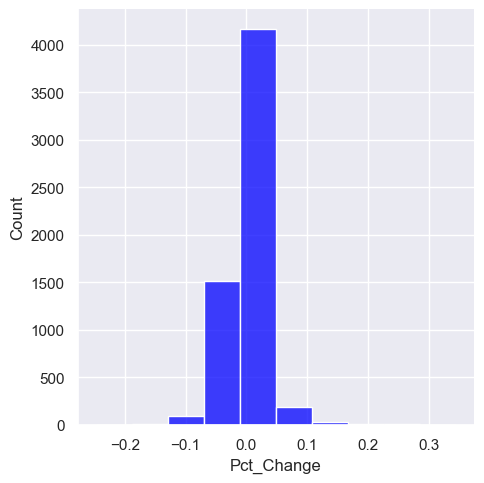

In [46]:
sns.displot(df['Pct_Change'].dropna(),bins=10,color='blue');

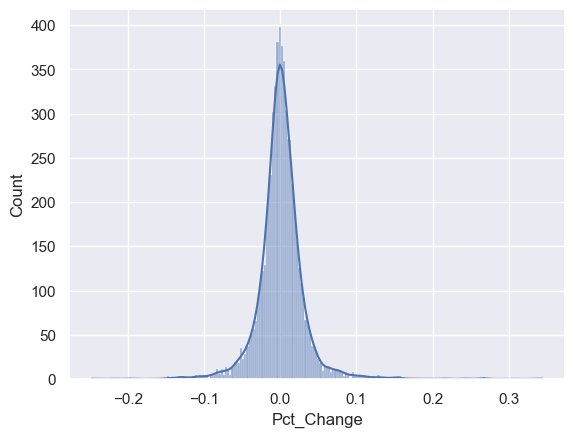

In [47]:
sns.histplot(df['Pct_Change'], kde=True);

## Future Pct Change

In [48]:
df.drop(['Year'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

Date     Close  Month  Day  Pct_Change  Direction    SMA-50   SMA-100  \
0 2000-05-24  2.428125      5   24    0.040161          1  2.945766  3.202320   
1 2000-05-25  2.275000      5   25   -0.063063         -1  2.927516  3.180383   
2 2000-05-26  2.325000      5   26    0.021978          1  2.907766  3.162664   
3 2000-05-30  2.587500      5   30    0.112903          1  2.894703  3.153664   
4 2000-05-31  2.415625      5   31   -0.066425         -1  2.878828  3.145039   

     EWM-50   EWM-100  
0  3.026825  3.112764  
1  3.009776  3.099679  
2  2.994295  3.087649  
3  2.985126  3.079926  
4  2.972328  3.069724

In [49]:
df['Pct_Change_Tomorrow'] = df['Pct_Change'].shift(-1)
df.head()

Date     Close  Month  Day  Pct_Change  Direction    SMA-50   SMA-100  \
0 2000-05-24  2.428125      5   24    0.040161          1  2.945766  3.202320   
1 2000-05-25  2.275000      5   25   -0.063063         -1  2.927516  3.180383   
2 2000-05-26  2.325000      5   26    0.021978          1  2.907766  3.162664   
3 2000-05-30  2.587500      5   30    0.112903          1  2.894703  3.153664   
4 2000-05-31  2.415625      5   31   -0.066425         -1  2.878828  3.145039   

     EWM-50   EWM-100  Pct_Change_Tomorrow  
0  3.026825  3.112764            -0.063063  
1  3.009776  3.099679             0.021978  
2  2.994295  3.087649             0.112903  
3  2.985126  3.079926            -0.066425  
4  2.972328  3.069724             0.038810

In [50]:
df['Pct_Change_10_days_later'] = df['Pct_Change'].shift(-10)
df.head()

Date     Close  Month  Day  Pct_Change  Direction    SMA-50   SMA-100  \
0 2000-05-24  2.428125      5   24    0.040161          1  2.945766  3.202320   
1 2000-05-25  2.275000      5   25   -0.063063         -1  2.927516  3.180383   
2 2000-05-26  2.325000      5   26    0.021978          1  2.907766  3.162664   
3 2000-05-30  2.587500      5   30    0.112903          1  2.894703  3.153664   
4 2000-05-31  2.415625      5   31   -0.066425         -1  2.878828  3.145039   

     EWM-50   EWM-100  Pct_Change_Tomorrow  Pct_Change_10_days_later  
0  3.026825  3.112764            -0.063063                  0.001206  
1  3.009776  3.099679             0.021978                  0.006024  
2  2.994295  3.087649             0.112903                 -0.071856  
3  2.985126  3.079926            -0.066425                  0.011613  
4  2.972328  3.069724             0.038810                 -0.052296

## Correlation:
The correlation coefficient ranges from -1 to +1.
- It assesses the linear relationship between two columns.
- When the scatter plot closely resembles a line with a positive slope, the correlation coefficient approaches one.
- Conversely, when the scatter plot closely resembles a line with a negative slope, the correlation coefficient approaches minus one.
- A correlation coefficient close to zero suggests that the scatter plot doesn't closely align with any particular line.

In [51]:
stock_list = ['AMZN','TSLA', 'ALL', 'GOOGL', 'AEP']
dfS = pd.DataFrame(columns=stock_list)
for i in stock_list:
  dfS[i] = yf.Ticker(i).history(start='2000-01-01', end='2020-12-31')['Close']

In [52]:
dfS.head()

AMZN  TSLA        ALL  GOOGL        AEP
Date                                                                  
2000-01-03 00:00:00-05:00  4.468750   NaN  13.042858    NaN  10.878956
2000-01-04 00:00:00-05:00  4.096875   NaN  12.626600    NaN  11.008724
2000-01-05 00:00:00-05:00  3.487500   NaN  13.181608    NaN  11.419661
2000-01-06 00:00:00-05:00  3.278125   NaN  13.112233    NaN  11.484541
2000-01-07 00:00:00-05:00  3.478125   NaN  13.597876    NaN  11.635943

In [53]:
dfS.dropna(inplace=True)
dfS.reset_index(inplace=True)
dfS.Date = pd.to_datetime(dfS.Date.dt.date)
dfS.head()

Date    AMZN      TSLA        ALL      GOOGL        AEP
0 2010-06-29  5.4305  1.592667  21.335148  11.367868  19.264553
1 2010-06-30  5.4630  1.588667  21.129227  11.134885  19.034731
2 2010-07-01  5.5480  1.464000  20.879183  10.998248  18.987591
3 2010-07-02  5.4570  1.280000  20.798286  10.924675  19.087759
4 2010-07-06  5.5030  1.074000  20.540884  10.912663  19.600462

In [54]:
dfS.corr()

Date      AMZN      TSLA       ALL     GOOGL       AEP
Date   1.000000  0.895117  0.601291  0.971000  0.969696  0.973419
AMZN   0.895117  1.000000  0.778974  0.851259  0.953533  0.890632
TSLA   0.601291  0.778974  1.000000  0.528240  0.705471  0.574317
ALL    0.971000  0.851259  0.528240  1.000000  0.950193  0.965794
GOOGL  0.969696  0.953533  0.705471  0.950193  1.000000  0.957103
AEP    0.973419  0.890632  0.574317  0.965794  0.957103  1.000000

In [55]:
# AMZN vs others
# descending order
dfS.corr()['AMZN'].sort_values(ascending=False)

AMZN     1.000000
GOOGL    0.953533
Date     0.895117
AEP      0.890632
ALL      0.851259
TSLA     0.778974
Name: AMZN, dtype: float64

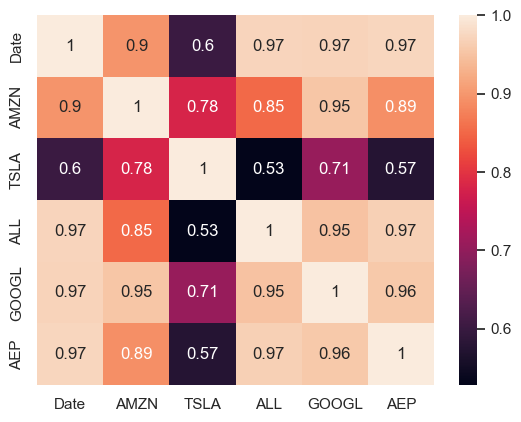

In [56]:
sns.heatmap(dfS.corr(), annot=True);

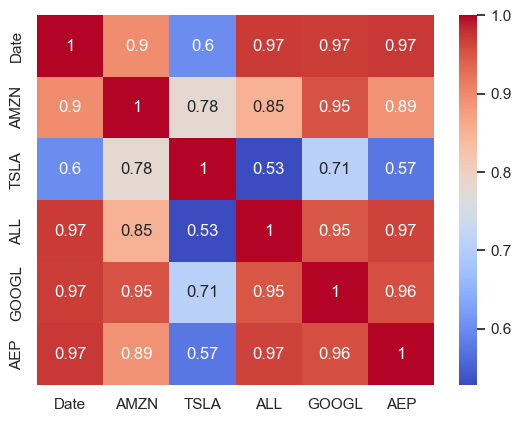

In [57]:
sns.heatmap(dfS.corr(), annot=True, cmap='coolwarm');

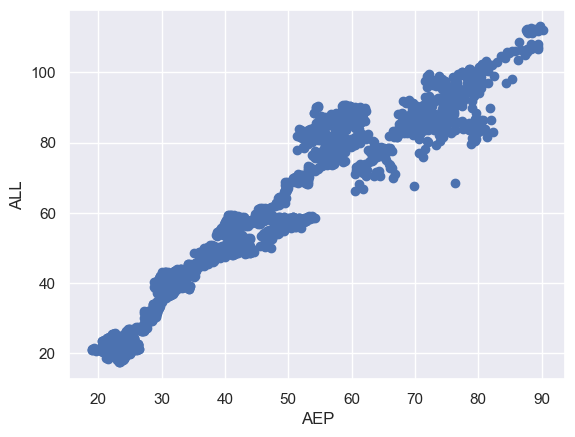

In [58]:
plt.scatter(dfS.AEP, dfS.ALL)
plt.xlabel('AEP')
plt.ylabel('ALL');

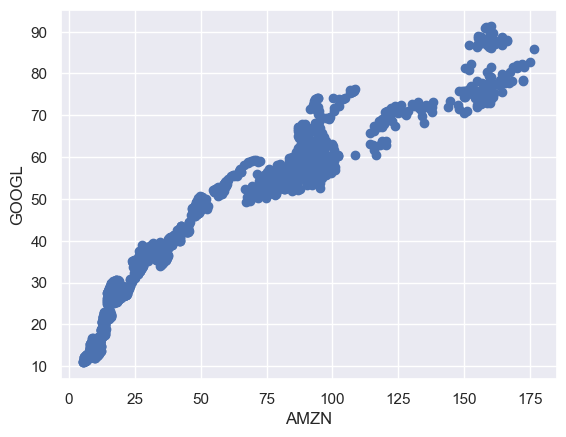

In [59]:
plt.scatter(dfS.AMZN, dfS.GOOGL)
plt.xlabel('AMZN')
plt.ylabel('GOOGL');

## Pairplot

In [60]:
dfS.head()

Date    AMZN      TSLA        ALL      GOOGL        AEP
0 2010-06-29  5.4305  1.592667  21.335148  11.367868  19.264553
1 2010-06-30  5.4630  1.588667  21.129227  11.134885  19.034731
2 2010-07-01  5.5480  1.464000  20.879183  10.998248  18.987591
3 2010-07-02  5.4570  1.280000  20.798286  10.924675  19.087759
4 2010-07-06  5.5030  1.074000  20.540884  10.912663  19.600462

In [61]:
dfS['Year'] = dfS.Date.dt.year
dfS['Day'] = dfS.Date.dt.day
dfS.head()

Date    AMZN      TSLA        ALL      GOOGL        AEP  Year  Day
0 2010-06-29  5.4305  1.592667  21.335148  11.367868  19.264553  2010   29
1 2010-06-30  5.4630  1.588667  21.129227  11.134885  19.034731  2010   30
2 2010-07-01  5.5480  1.464000  20.879183  10.998248  18.987591  2010    1
3 2010-07-02  5.4570  1.280000  20.798286  10.924675  19.087759  2010    2
4 2010-07-06  5.5030  1.074000  20.540884  10.912663  19.600462  2010    6

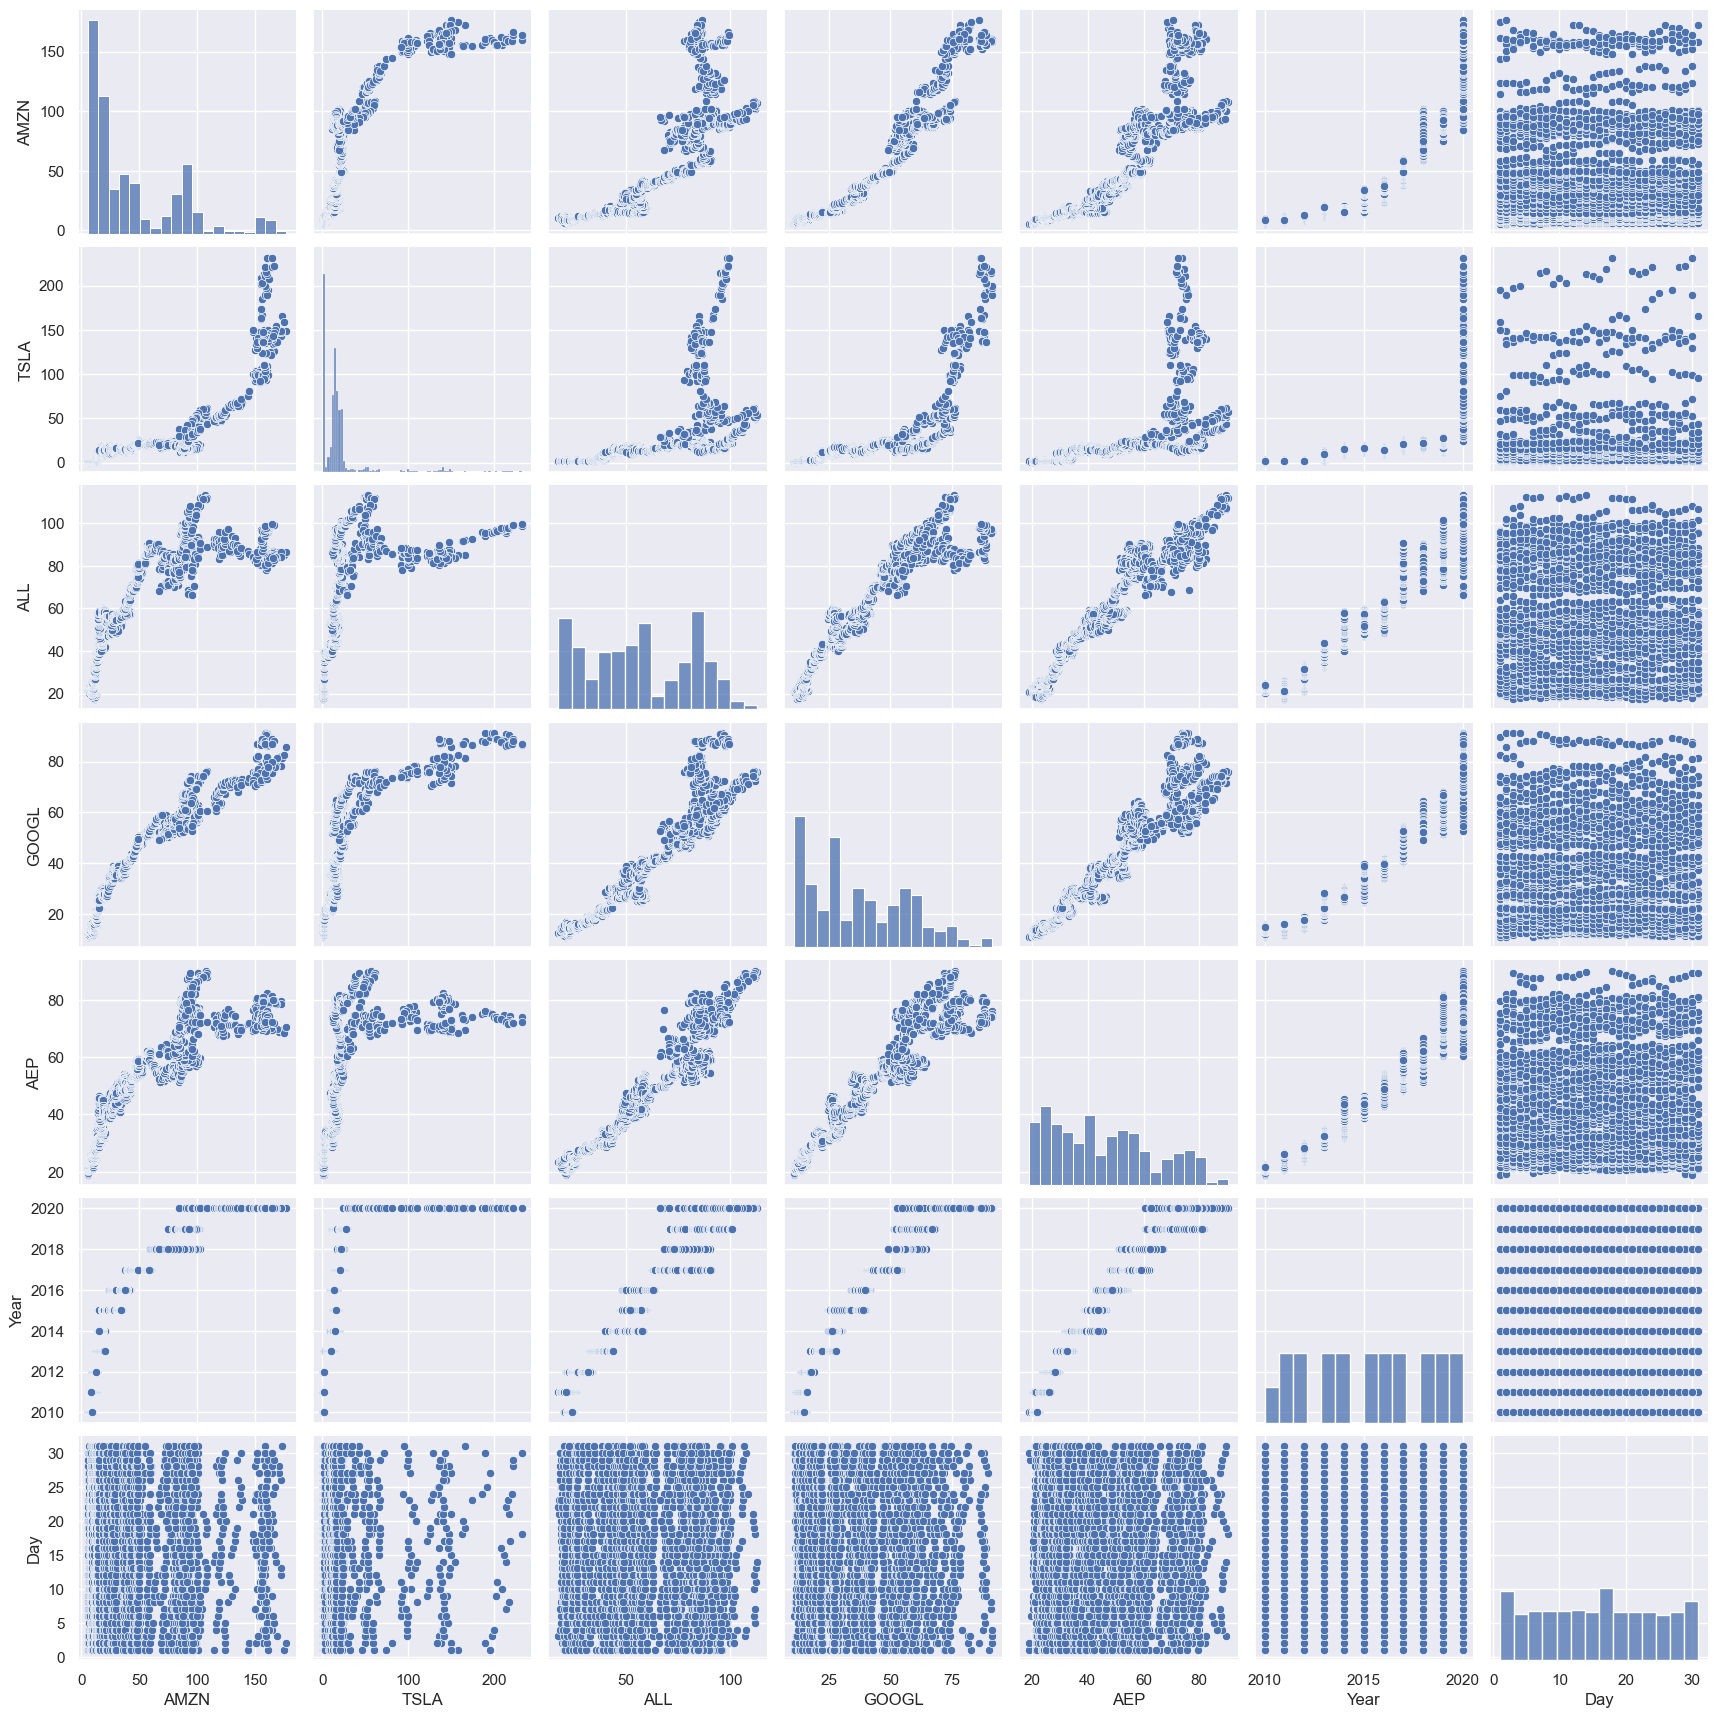

In [62]:
sns.pairplot(dfS);

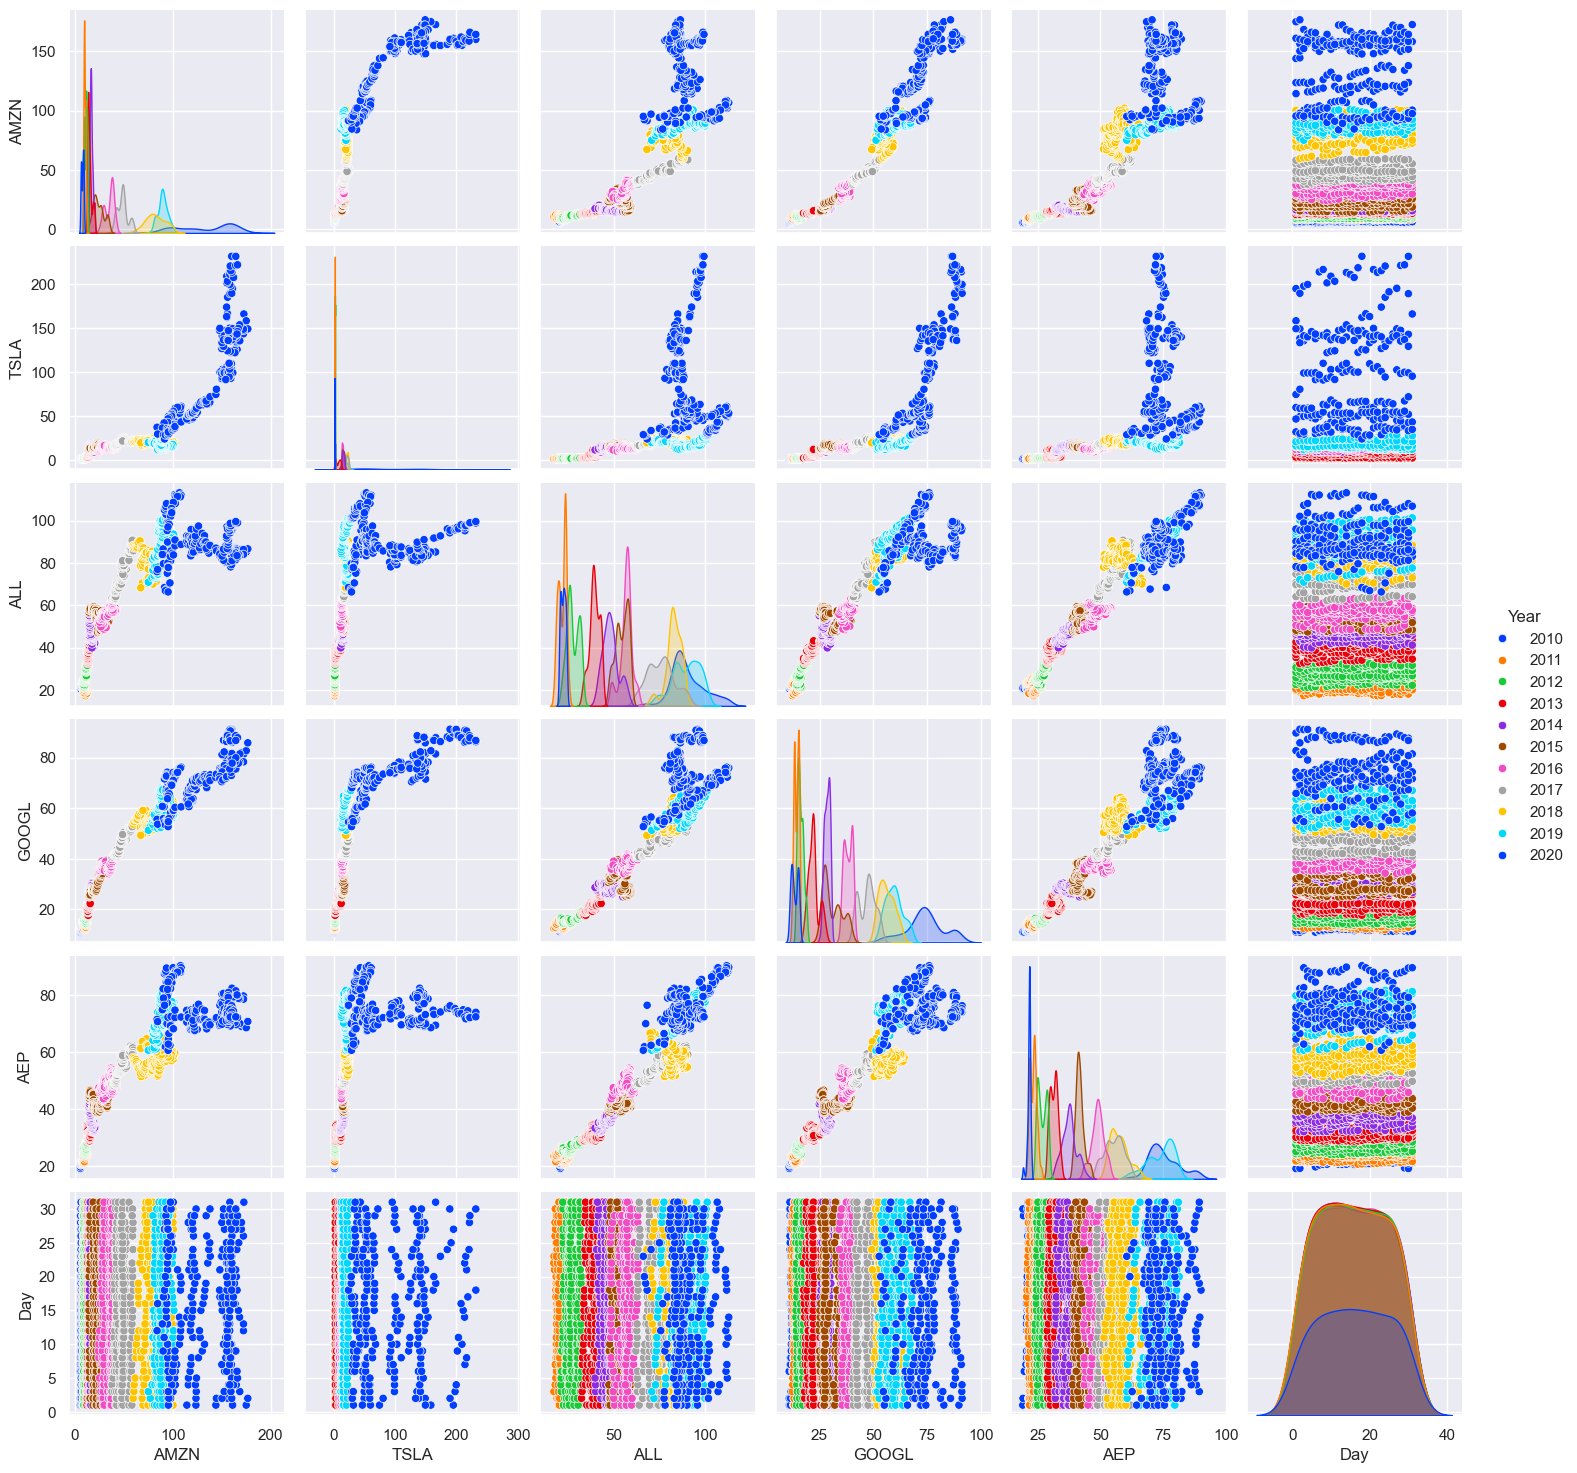

In [63]:
sns.pairplot(dfS, hue='Year', palette='bright');

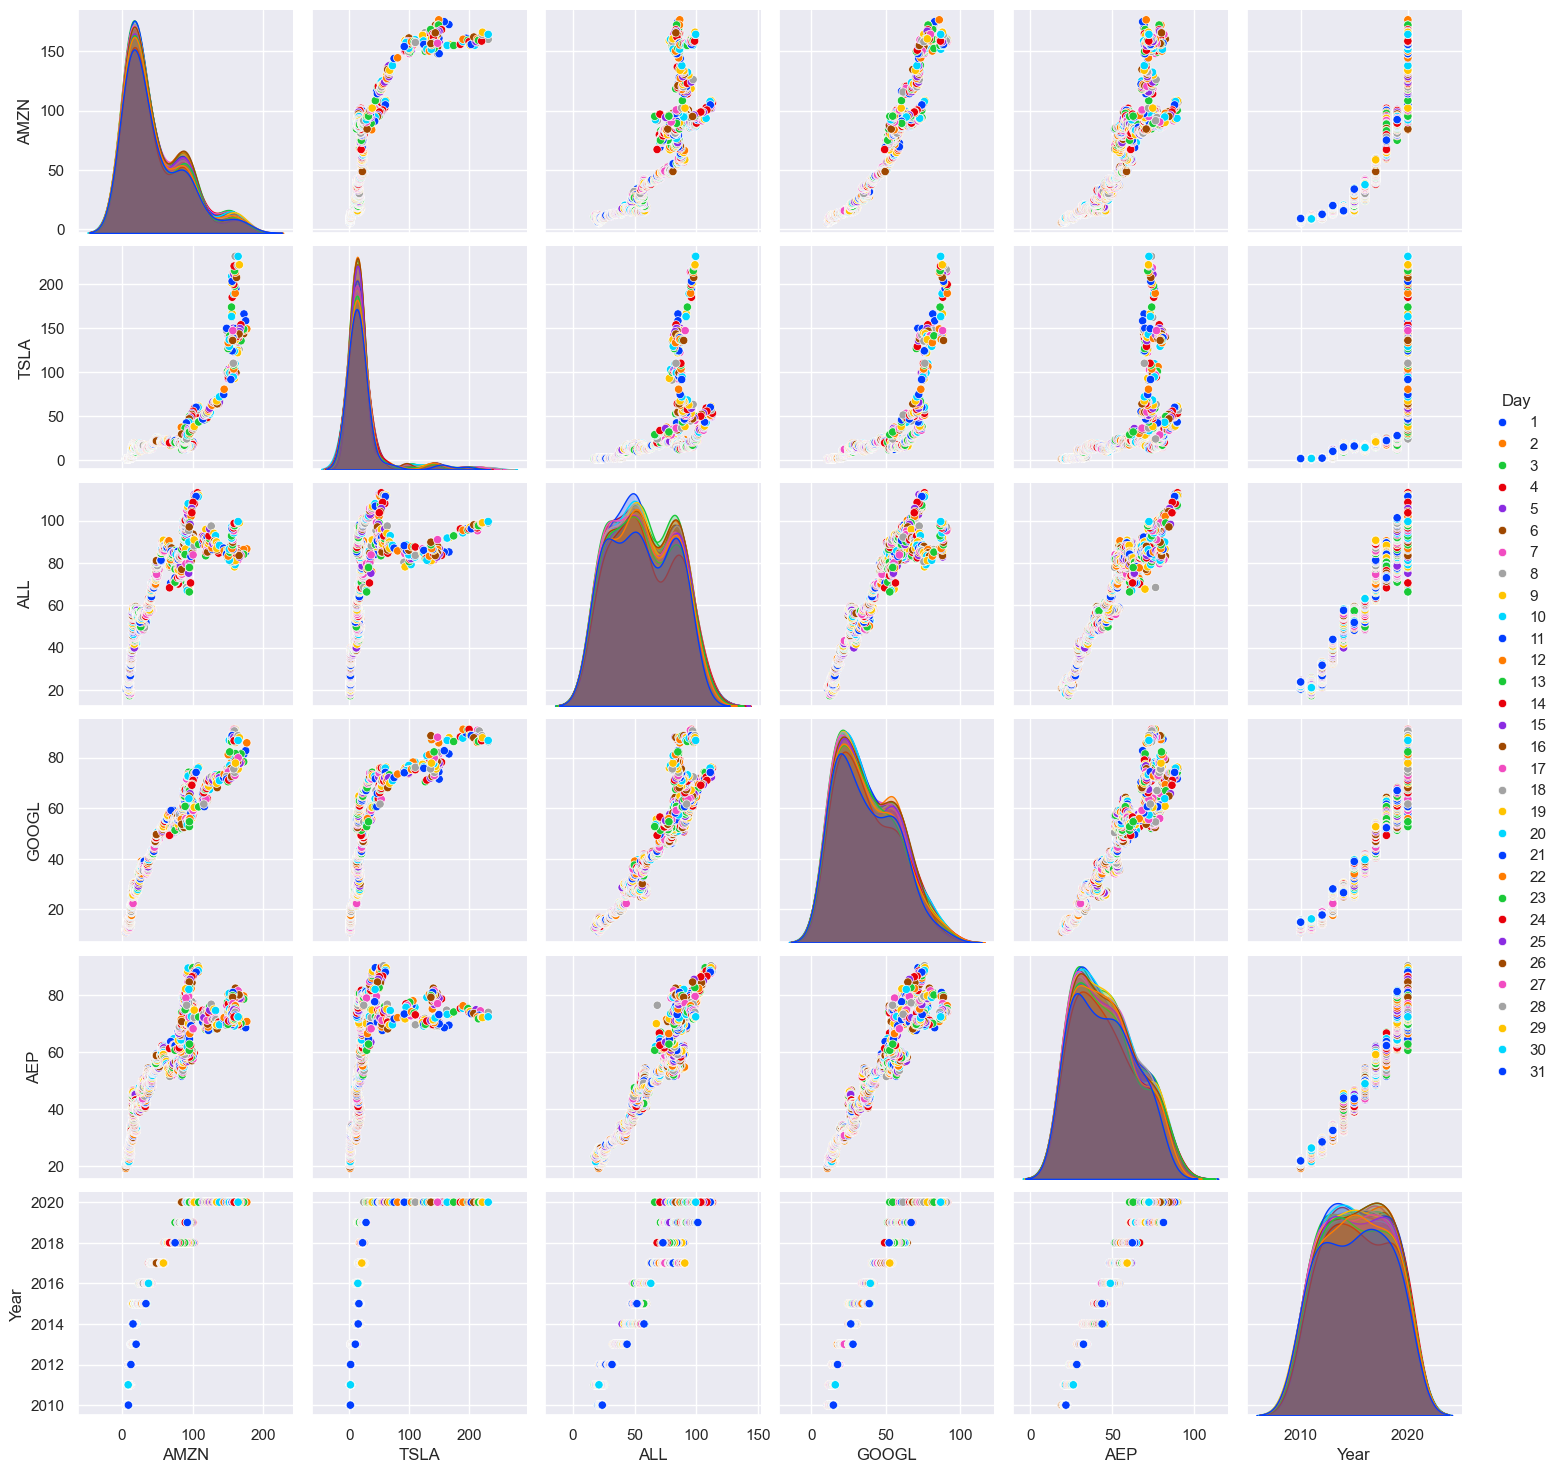

In [64]:
sns.pairplot(dfS, hue='Day', palette='bright');

## Change in a day

In [65]:
df2 = amazon[['Date', 'Low', 'High','Open', 'Close']].copy()
df2.head()

Date       Low      High      Open     Close
0 2000-01-03  3.952344  4.478125  4.075000  4.468750
1 2000-01-04  4.087500  4.575000  4.268750  4.096875
2 2000-01-05  3.400000  3.756250  3.525000  3.487500
3 2000-01-06  3.200000  3.634375  3.565625  3.278125
4 2000-01-07  3.309375  3.525000  3.350000  3.478125

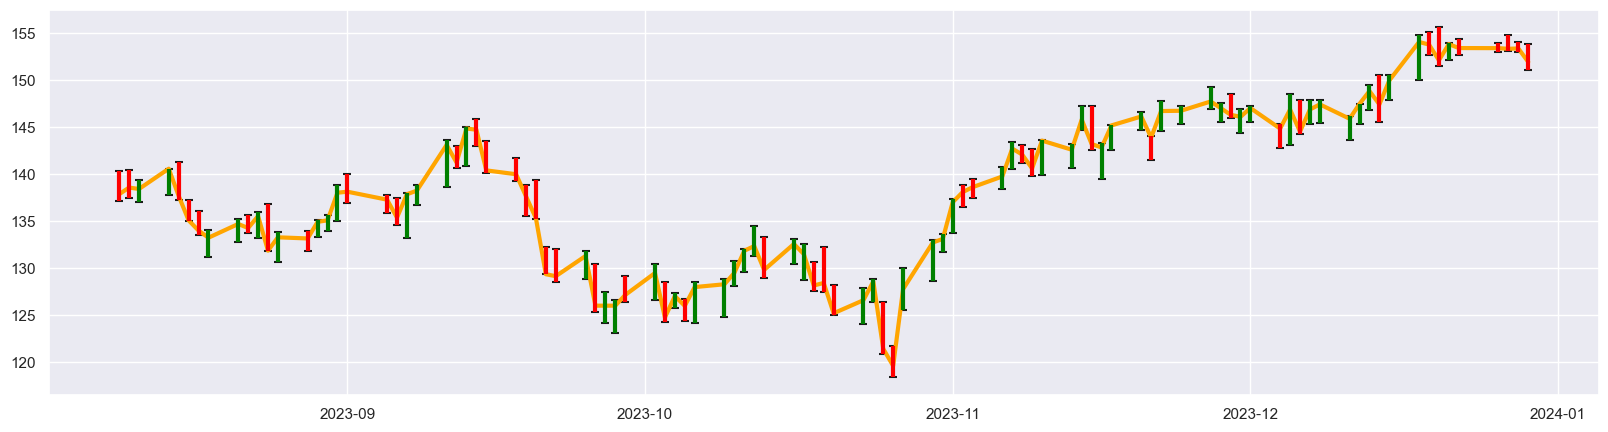

In [66]:
N = 100
plt.figure(figsize=(20,5))

plt.plot(df2.Date[-N:], df2.Close[-N:], linewidth=3, color='orange')
plt.scatter(df2.Date[-N:], df2.Low[-N:], c='k', s=40, marker='_')
plt.scatter(df2.Date[-N:], df2.High[-N:], c='k', s=40, marker='_')

for i in range(1, N+1):
  if df2.Open[len(df2)-i] > df2.Close[len(df2)-i]:
    col ='red'
  elif df2.Open[len(df2)-i] < df2.Close[len(df2)-i]:
    col='green'
  else:
    col='gray'

  plt.vlines(df2.Date[len(df2)-i], df2.Low[len(df2)-i], df2.High[len(df2)-i], color=col, linewidth=3 )


## Resample
- resample() groups the rows and apply a method to all groups.
- *rule* parameter detrmines the grouping
    - `W`:weekly frequency
    - `M`:month end frequency
    - `SM`:semi-month end frequency (15th and end of month)
    - `MS`:month start frequency
    - `Q`: quarter end frequency
    - `QS`: quarter start frequency
    - `A`:year end frequency
    - `AS, YS`:year start frequency

In [67]:
dfRS = df[['Date', 'Close']].copy()
dfRS.set_index('Date', inplace=True)
dfRS.head()

Close
Date                
2000-05-24  2.428125
2000-05-25  2.275000
2000-05-26  2.325000
2000-05-30  2.587500
2000-05-31  2.415625

In [68]:
# max of each year
dfRS.resample(rule='Y').max().head()

Close
Date               
2000-12-31  2.89375
2001-12-31  1.09375
2002-12-31  1.21250
2003-12-31  2.99550
2004-12-31  2.85900

In [69]:
# mean of each year
dfRS.resample(rule='Y').mean().head()

Close
Date                
2000-12-31  1.755035
2001-12-31  0.610021
2002-12-31  0.824206
2003-12-31  1.887069
2004-12-31  2.178262

In [70]:
# Quarter start
dfRS.resample(rule='QS').max().head()

Close
Date               
2000-04-01  2.89375
2000-07-01  2.29375
2000-10-01  1.98750
2001-01-01  1.09375
2001-04-01  0.87800

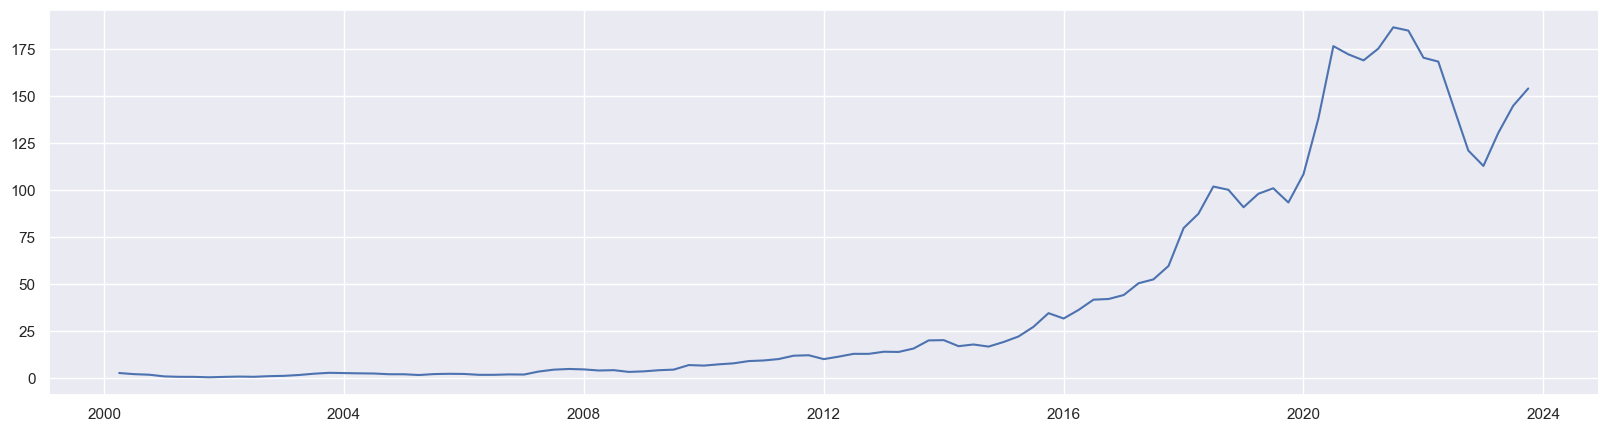

In [71]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
plt.figure(figsize=(20,5))
plt.plot(dfRS.resample(rule='QS').max());

In [72]:
dfRS.resample(rule='Y').max().head()

Close
Date               
2000-12-31  2.89375
2001-12-31  1.09375
2002-12-31  1.21250
2003-12-31  2.99550
2004-12-31  2.85900

In [73]:
val = dfRS.resample(rule='Y').mean().values.flatten()
val

array([  1.75503473,   0.61002129,   0.82420635,   1.88706945,
         2.17826191,   1.99485516,   1.79546614,   3.3614741 ,
         3.49400197,   4.36409127,   6.95701984,   9.83360118,
        11.015182  ,  14.9015794 ,  16.62755161,  23.90691464,
        34.97615664,  48.40835056,  82.08630853,  89.45946024,
       134.04275452, 167.19334932, 126.09881881, 121.37280035])

In [74]:
years = dfRS.resample(rule='Y').max().index
years

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

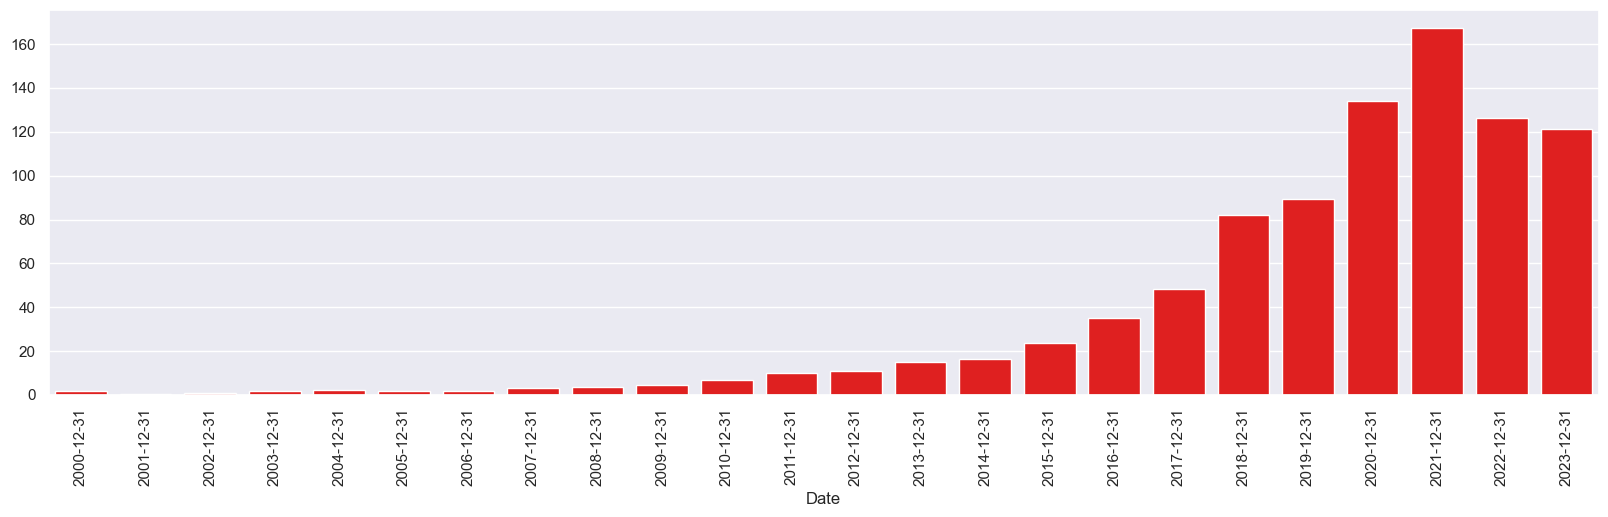

In [75]:
plt.figure(figsize=(20,5))
sns.barplot(x=years, y=val, color='red' )
plt.xticks(rotation=90);

In [76]:
str_years = [i.strftime('%Y/%m/%d') for i in years]
str_years[:5]

['2000/12/31', '2001/12/31', '2002/12/31', '2003/12/31', '2004/12/31']

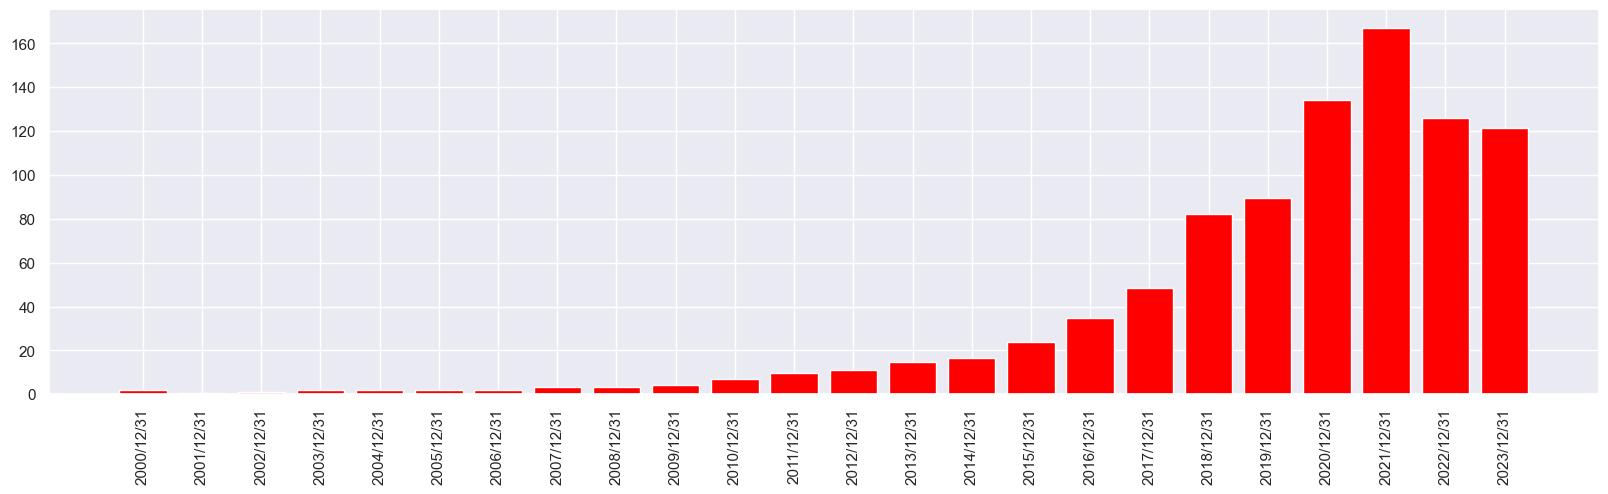

In [77]:
plt.figure(figsize=(20,5))
plt.bar(str_years, val, color='red' )
plt.xticks(rotation=90);

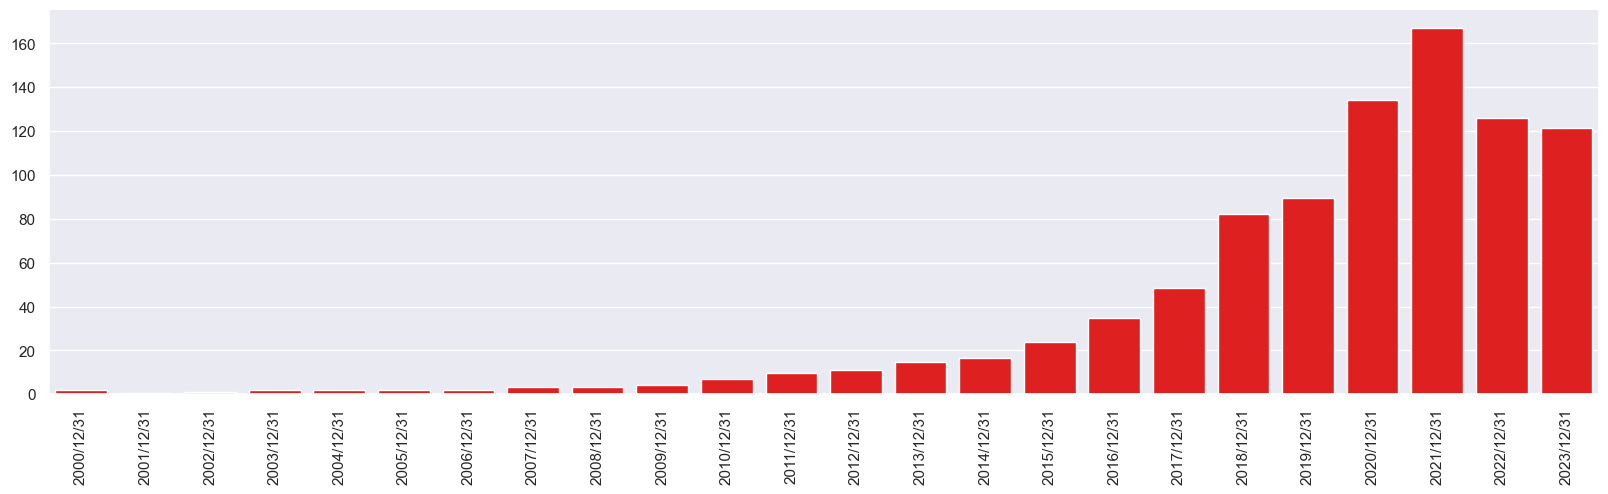

In [78]:
plt.figure(figsize=(20,5))
sns.barplot(x=str_years, y=val, color='red' )
plt.xticks(rotation=90);

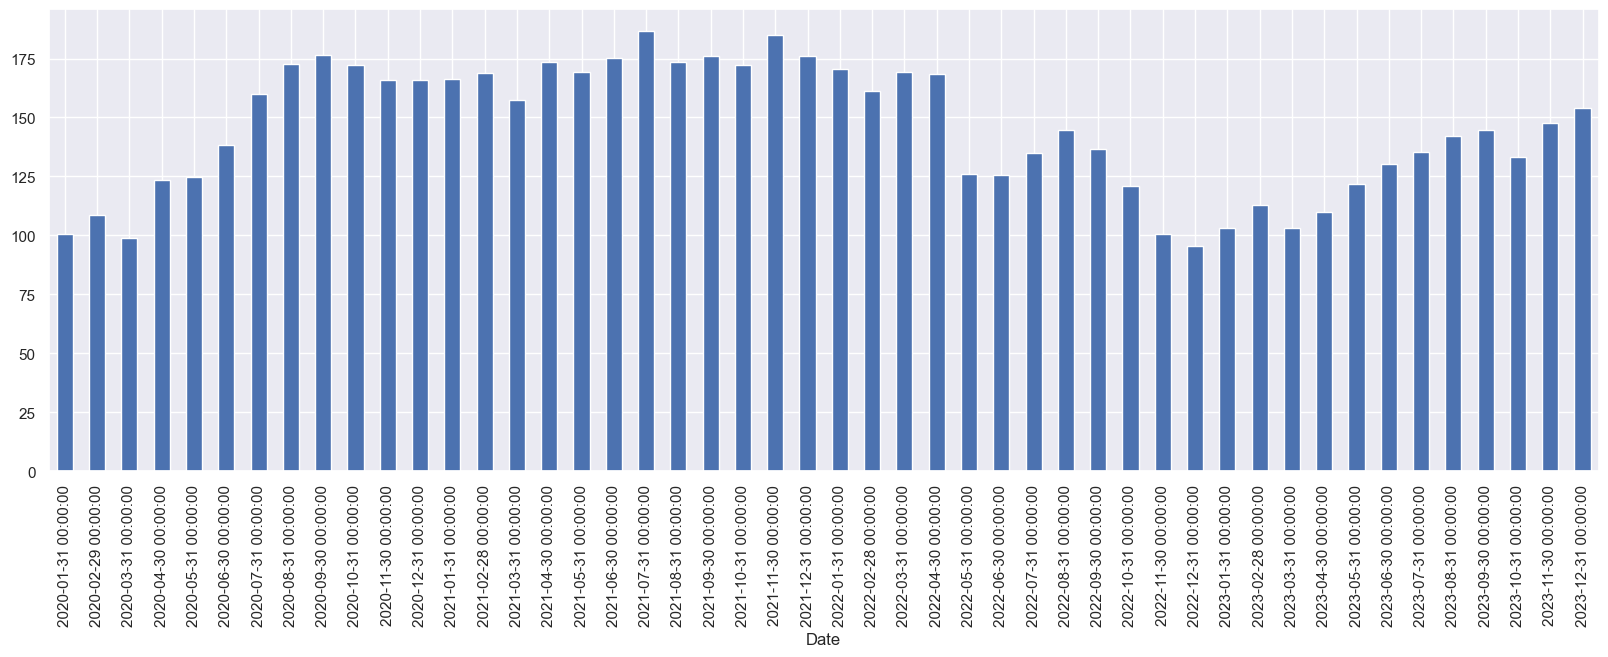

In [79]:
dfRS['Close'][-1000:].resample(rule='M').max().plot(kind='bar',figsize=(20,6));

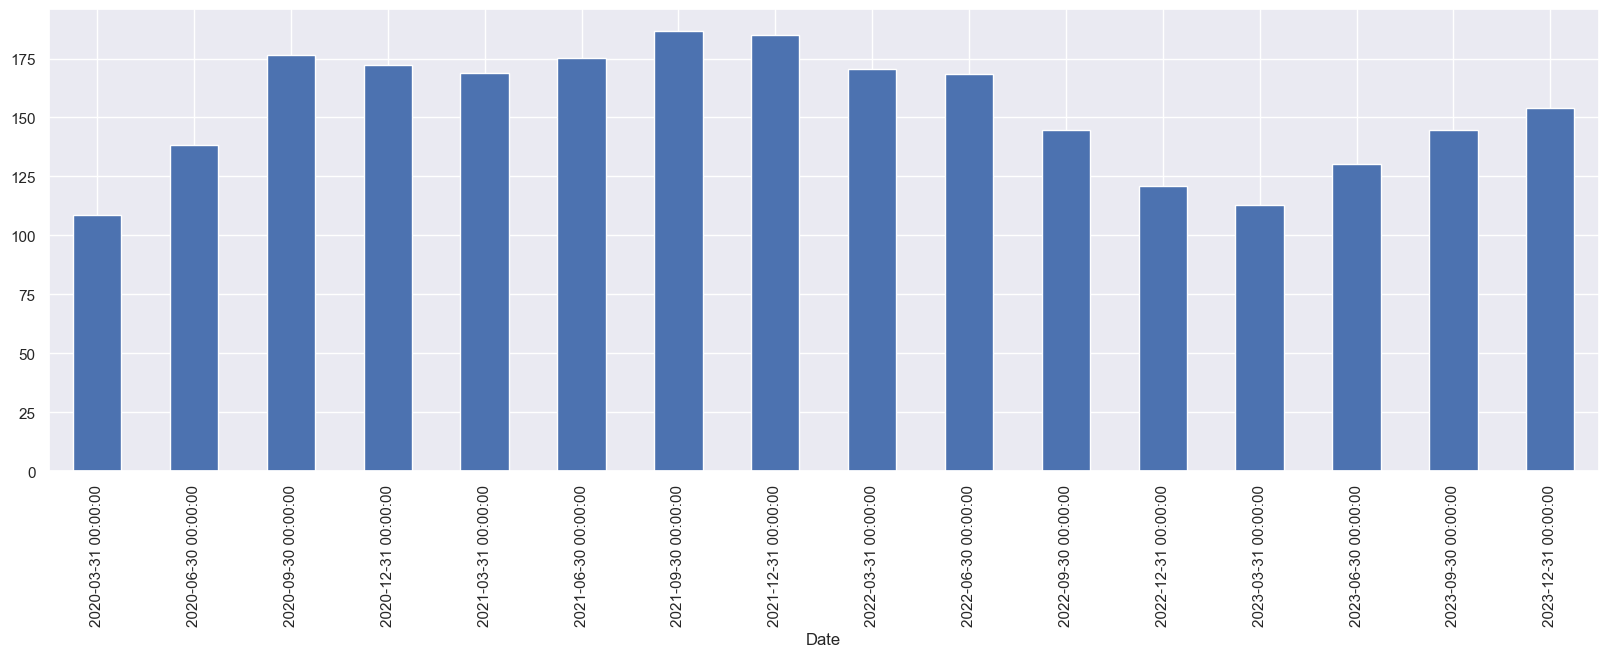

In [80]:
dfRS['Close'][-1000:].resample(rule='Q').max().plot(kind='bar',figsize=(20,6));

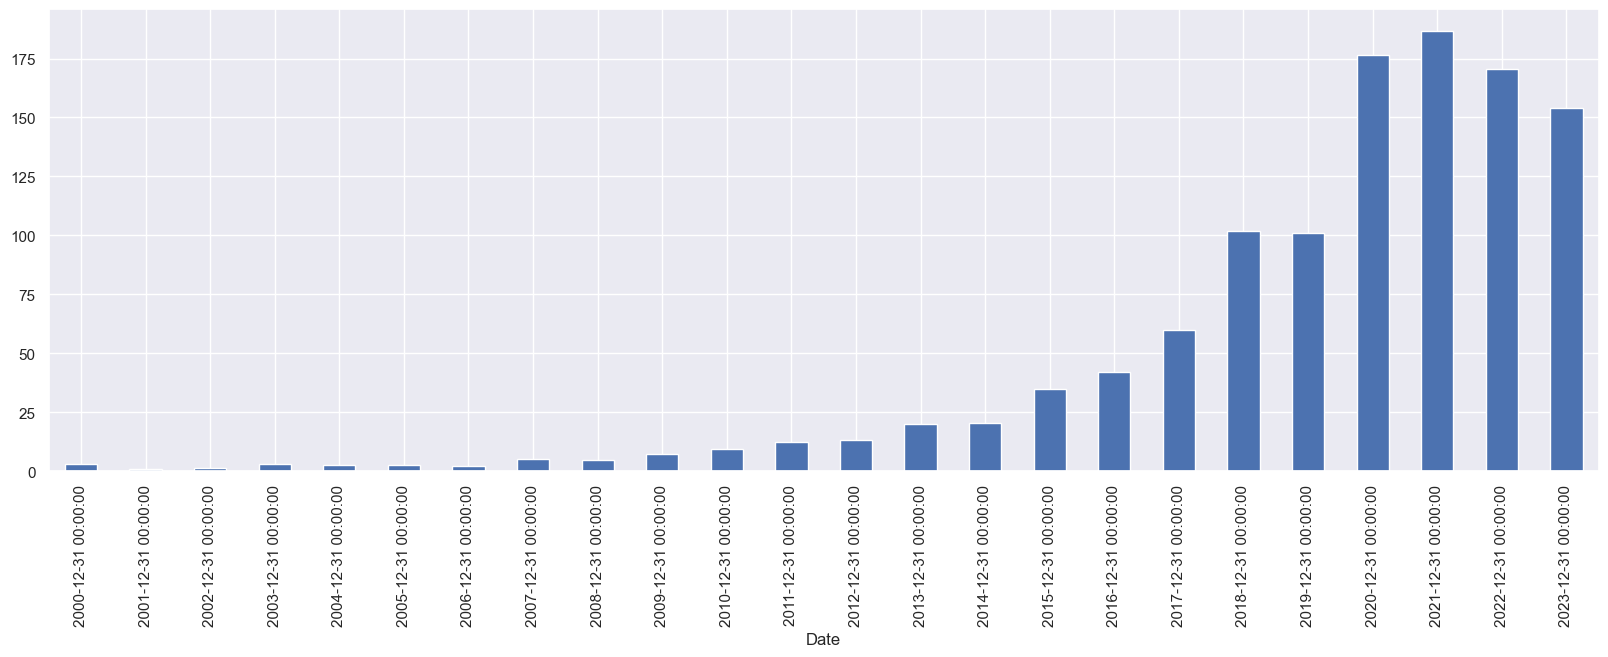

In [81]:
dfRS['Close'].resample(rule='Y').max().plot(kind='bar',figsize=(20,6));